## Notebook to perform basic stats on the american influence in the cinema by analyzing:
- thenumber of american films produced worlwide (CMU dataset)
- the ranking of american movies in the world box office (CMU dataset)
- the public's appreciation of american movies obtained through ratings from the IMDB dataset

In [1]:
# import the libraries
import os
import ast # needed to clean the dataset
import math
import gzip # since IMDB datasets are compressed in the .gz format
import shutil # needed to write the .tsv file in a new file of IMDB dataset after extracting ir
import tarfile # sinve CMU datasets are compressed in the .tar.gz format
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Unzip all data folders (CMU + IMDB) at once

In [2]:
# in a separated cell to avoid running the same extraction cell everytime
DATA_FOLDER = "data/raw/"
CMU_SUBFOLDER = "CMU/"
IMDB_SUBFOLDER = "IMDB/"

In [5]:
# Extraction
compressed_folders_list_CMU = ["data/raw_zip/MovieSummaries.tar.gz", "data/raw_zip/corenlp_plot_summaries.tar"] # 2 CMU datasets
compressed_files_list_IMDB = ["data/raw_zip/title.akas.tsv.gz", "data/raw_zip/title.ratings.tsv.gz", "data/raw_zip/title.basics.tsv.gz"] # test with only 3 at start

##### CMU
# Extract contents of the .tar file into the folder
for compressed_folder in compressed_folders_list_CMU:
    with tarfile.open(compressed_folder, 'r') as tar_ref:
        tar_ref.extractall(path=DATA_FOLDER + CMU_SUBFOLDER)
        print(f"Extraction completed of folder {compressed_folder}.")       
# après y'a encore bcp de ficheirs xml.gz à extraire dans le corenplot datasets --> pour plus tard

###### IMDB
# the procedure is different here since the IMDB files are compressed in the gz format and are single files, not folders
for compressed_file in compressed_files_list_IMDB:
    tsv_file_path = os.path.join(DATA_FOLDER, IMDB_SUBFOLDER, os.path.basename(compressed_file)[:-3]) # remove the 3 last characters corresponding to '.gz' so that a clean tsv file is created
    with gzip.open(compressed_file, 'rb') as file_in:
        with open(tsv_file_path, 'wb') as file_out:
            shutil.copyfileobj(file_in, file_out)
            print(f"TSV file {tsv_file_path} created")

print(f"All tsv files have been cretad and saved in the {IMDB_SUBFOLDER} subfolder.")

Extraction completed of folder data/raw_zip/MovieSummaries.tar.gz.
Extraction completed of folder data/raw_zip/corenlp_plot_summaries.tar.
TSV file data/raw/IMDB/title.akas.tsv created
TSV file data/raw/IMDB/title.ratings.tsv created
TSV file data/raw/IMDB/title.basics.tsv created
All tsv files have been cretad and saved in the IMDB/ subfolder.


In [ ]:
# possible d'ouvrir les tsv du IMDB directe en dataframes en une seule fois mais perend presque 2 minutes donc j'ai préféré séparer l'exctraction de la création de dataframes
'''compressed_folders_list_IMDB = ["title.akas.tsv.gz", "title.ratings.tsv.gz"] # test with oly 2 at start
IMDB_df_list = []

for compressed_folder in compressed_folders_list_IMDB:
    with gzip.open(compressed_folder, 'r') as gz_ref:
        IMDB_df_list.append(pd.read_csv(gz_ref, delimiter= '\t', header = None))

# store the dataframes in more explicitly names variables
df_akas_title_IMDB = IMDB_df_list[0]
df_ratings_IMDB = IMDB_df_list[1]

df_ratings_IMDB.head()'''

## Read datasets and create pandas dataframe for both CMU and IMDB datasets

In [3]:
# this cell takes 3' tuo run since title.basics.tsv contains 11 millions movies
## CMU
file_path = DATA_FOLDER + CMU_SUBFOLDER + "/MovieSummaries"

df_plot_summaries_CMU = pd.read_csv(file_path + "/plot_summaries.txt", delimiter="\t", header=None, names=["ID", "Summary"]) # renaming the columns for better understanding
df_movie_metadata_CMU = pd.read_csv(file_path + "/movie.metadata.tsv", delimiter="\t", header=None) 
df_character_metadata_CMU = pd.read_csv(file_path + "/character.metadata.tsv", delimiter="\t", header=None) 
df_tvtropes_clusters_CMU = pd.read_csv(file_path + "/tvtropes.clusters.txt", delimiter="\t", header=None) 
df_name_clusters_CMU = pd.read_csv(file_path + "/name.clusters.txt", delimiter="\t", header=None) 

## IMDB
df_akas_IMDB = pd.read_csv(DATA_FOLDER + IMDB_SUBFOLDER + "/title.akas.tsv", delimiter = '\t')
#df_basics_IMDB = pd.read_csv(DATA_FOLDER + IMDB_SUBFOLDER + "/title.basics.tsv", delimiter = '\t')
df_ratings_IMDB = pd.read_csv(DATA_FOLDER + IMDB_SUBFOLDER + "/title.ratings.tsv", delimiter = '\t')

In [ ]:
# Test cell to see if the csv problem is coming from the IMDB dataset
# Define explicit data types for columns with mixed data types
dtype_spec = {
    'startYear': 'string',  # Load as string for initial cleaning
    'endYear': 'string',
    'runtimeMinutes': 'string'
}
df_basics_IMDB = pd.read_csv(
    os.path.join(DATA_FOLDER, IMDB_SUBFOLDER, "title.basics.tsv"),
    delimiter='\t',
    dtype=dtype_spec
)


C:\Users\luca\AppData\Local\Temp\ipykernel_41604\1334486515.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics_IMDB = pd.read_csv(


In [4]:
print(f"The shape of the title.ratings IMDB dataset is: {df_ratings_IMDB.shape}")
df_ratings_IMDB.head()

The shape of the title.ratings IMDB dataset is: (1489867, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2096
1,tt0000002,5.6,283
2,tt0000003,6.5,2104
3,tt0000004,5.4,183
4,tt0000005,6.2,2841


In [5]:
print(f"The shape of the title.basics IMDB dataset is: {df_basics_IMDB.shape}") # about 11 millions of movies et only 1 millions movies with ratings according to the above cell
print(f"The unique \n{df_basics_IMDB.nunique()}")
print(df_basics_IMDB.dtypes)
df_basics_IMDB.head()

The shape of the title.basics IMDB dataset is: (11179851, 9)
The unique 
tconst            11179851
titleType               11
primaryTitle       5017287
originalTitle      5041707
isAdult                 44
startYear              152
endYear                 97
runtimeMinutes         935
genres                2380
dtype: int64
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [6]:
print(f"The shape of the title.akas IMDB dataset is: {df_akas_IMDB.shape}")
df_akas_IMDB.head()

The shape of the title.akas IMDB dataset is: (50153662, 8)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0


## Cleaning the movie.metadata dataset


First inspection on original df

In [34]:
# Increase the display width to see more characters per column
pd.set_option('display.max_colwidth', None)  # This removes the column width limit

# Remainig the columns for a better understanding 
df_movie_metadata_CMU.columns = ['wiki_movie_ID', 'freebase_movie_ID', 'name', 'release_date', 'box_office', 'runtime', 'languages', 'countries', 'genres']
df_movie_metadata_CMU.head(10)

# https://www.studiobinder.com/blog/what-was-the-first-movie-ever-made/ 

# https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column 

# https://www.statology.org/pandas-remove-characters-from-string/ 

,wiki_movie_ID,freebase_movie_ID,name,release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0"": ""Drama"", ""/m/0hj3n01"": ""Crime Drama""}"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""Drama""}"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic thriller"", ""/m/09blyk"": ""Psychological thriller""}"
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indie"", ""/m/01g6gs"": ""Black-and-white"", ""/m/01z4y"": ""Comedy""}"
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fantasy"", ""/m/03k9fj"": ""Adventure"", ""/m/03q4nz"": ""World cinema""}"
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ""/m/01g6gs"": ""Black-and-white""}"
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}"
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatural""}"


Cleaning and saving in a .csv file

In [35]:
# Cleaning

clean_df_movie_metadata_CMU = df_movie_metadata_CMU.copy() # copy of original data frame to avoid messing it up

# Define a helper function to extract the names by importing **ast** to safely parse the strings into dictionaries
def clean_column(dict_string):
    # Use ast.literal_eval to safely parse the string into a dictionary as in
    # https://stackoverflow.com/questions/39169718/convert-string-to-dict-then-access-keyvalues-how-to-access-data-in-a-class 
    try:
        parsed_dict = ast.literal_eval(dict_string)
        return ', '.join(parsed_dict.values())  # Join all names into a single string based on the comma between them
    except (ValueError, SyntaxError):
        return dict_string  # Return the string as it is if parsing fails

# cleaning the dataset columns
clean_df_movie_metadata_CMU['languages'] = clean_df_movie_metadata_CMU['languages'].apply(clean_column)
clean_df_movie_metadata_CMU['countries'] = clean_df_movie_metadata_CMU['countries'].apply(clean_column)
clean_df_movie_metadata_CMU['genres'] = clean_df_movie_metadata_CMU['genres'].apply(clean_column)

# creating a new columns for the 'realease_date' of the movie
# parmeter 'coerce' to convert the relase year to float64 while keeping NaN values
clean_df_movie_metadata_CMU['release_year'] = pd.to_numeric(clean_df_movie_metadata_CMU['release_date'].astype(str).str[:4], downcast="integer", errors = 'coerce')
clean_df_movie_metadata_CMU['release_year'] = clean_df_movie_metadata_CMU['release_year'].astype('Int64')
#print(clean_df_movie_metadata_CMU.dtypes)


#clean_movie_metadata = clean_df_movie_metadata_CMU.to_csv(path_or_buf= DATA_FOLDER + CMU_SUBFOLDER + "/cleaned_dataframes_csv/cleaned_movie_metadata.csv", encoding='utf-8-sig')

clean_df_movie_metadata_CMU.head(20)

,wiki_movie_ID,freebase_movie_ID,name,release_date,box_office,runtime,languages,countries,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, Supernatural, Action, Space western",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"Silent film, English Language",United States of America,"Short Film, Silent film, Indie, Black-and-white, Comedy",1913
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,English Language,South Africa,"Family Film, Fantasy, Adventure, World cinema",2002
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,English Language,United States of America,"Musical, Comedy, Black-and-white",1938
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,Spanish Language,Argentina,"Musical, Drama, Comedy",1974
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,English Language,United Kingdom,"Horror, Supernatural",1960


In [37]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Adjust width to avoid line breaks

clean_df_movie_metadata_CMU[['runtime', 'name', 'release_year', 'release_date']].sort_values(ascending= False, by = 'runtime').head(25)

,runtime,name,release_year,release_date
12804,1079281.00,Zero Tolerance,1995,1995
62962,14400.00,Modern Times Forever,<NA>,NaN
71100,9360.00,Cinématon,2011,2011
21733,5700.00,Matrjoschka,2006,2006-04-23
46666,5220.00,The Cure for Insomnia,1987,1987-01-31
16316,5100.00,Paradise in Harlem,<NA>,NaN
27036,4875.27,Kai Koduttha Dheivam,1964,1964-07-18
68223,2880.00,The Longest Most Meaningless Movie in the World,1968,1968
73658,2425.00,Gigantor,1963,1963-10-20
73630,1966.00,Dil Ne Phir Yaad Kiya,1966,1966


In [ ]:
# Check for unexpected values in freebase_movie_ID
unexpected_values = clean_df_movie_metadata_CMU[~clean_df_movie_metadata_CMU['freebase_movie_ID'].str.startswith('/m/')]
if not unexpected_values.empty:
    print("Unexpected values in freebase_movie_ID:")
    print(unexpected_values)

# so the problem of csv file writing is not coming from freebase ID

In [9]:
# une seule problématic date qui fait planeter les lignes commentée suivates car 
# As it is clearly stated in the online documentation you can't have values of datetime64[ns] dtype that are not falling into ['1677-09-21 00:12:43.145225', '2262-04-11 23:47:16.854775807'].
# cf https://stackoverflow.com/questions/57056424/pandas-outofboundsdatetime-when-cleaning-different-date-formats-with-dates-befor 
#clean_df_movie_metadata_CMU['release_date'] = pd.to_datetime(clean_df_movie_metadata_CMU['release_date'], format='mixed')
#clean_df_movie_metadata_CMU['release_year'] = clean_df_movie_metadata_CMU['release_year'].dt.year
problematic_dates = clean_df_movie_metadata_CMU[clean_df_movie_metadata_CMU['release_date'] < '1677-01-01']
print(problematic_dates)


       wiki_movie_ID freebase_movie_ID            name release_date  \
62836       29666067        /m/0fphzrf  Hunting Season   1010-12-02   

       box_office  runtime                           languages countries  \
62836  12160978.0    140.0  Turkish Language, English Language    Turkey   

                                        genres  release_year  
62836  Crime Fiction, Mystery, Drama, Thriller          1010  


In [ ]:
# autre psosibilité encor emoinclaires et qui marchent moins bien je trouve
'''clean_df_movie_metadata_CMU['languages'] = clean_df_movie_metadata_CMU['languages'].str.extract(r'"[^"]+":\s*"([^"]+)"')
clean_df_movie_metadata_CMU['genres'] = clean_df_movie_metadata_CMU['genres'].apply(
    lambda x: list(ast.literal_eval(x).values()) if isinstance(ast.literal_eval(x), dict) else ast.literal_eval(x)
)'''

## Cleaning the character.metadata dataset

First inspection on original df

In [ ]:
# https://en.wikipedia.org/wiki/Freebase_(database)#:~:text=On%2016%20December%202015,on%20August%204%2C%202020

Cleaning and saving in a .csv file

## Merging of the CMU and IMDB datasets

### Merging the different tsv files of the IMDB dataset

In [15]:
# https://github.com/Stefanstud/CS401-movies-analysis 

df_basics_ratings_merged_IMDB = pd.merge(df_basics_IMDB, df_ratings_IMDB, on = 'tconst', how = 'inner') # inner join because want to keep only movies that have been rated by the public

print(f"The size of the merged dataframe containing data from title.basics and title.ratings is {df_basics_ratings_merged_IMDB.shape}")
print(df_basics_ratings_merged_IMDB.dtypes)
df_basics_ratings_merged_IMDB.head(-20)

The size of the merged dataframe containing data from title.basics and title.ratings is (1489846, 11)
tconst                    object
titleType                 object
primaryTitle              object
originalTitle             object
isAdult                   object
startYear         string[python]
endYear           string[python]
runtimeMinutes    string[python]
genres                    object
averageRating            float64
numVotes                   int64
dtype: object


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,2096
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.6,283
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance",6.5,2104
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.4,183
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2841
...,...,...,...,...,...,...,...,...,...,...,...
1489821,tt9916450,tvEpisode,Horrid Henry and the Fashion Show,Horrid Henry and the Fashion Show,0,2012,\N,10,"Adventure,Animation,Comedy",8.0,10
1489822,tt9916460,tvMovie,Pink Taxi,Pink Taxi,0,2019,\N,\N,Comedy,8.9,19
1489823,tt9916486,tvEpisode,Horrid Henry and the Bogey Brain Sleepover,Horrid Henry and the Bogey Brain Sleepover,0,2012,\N,10,"Adventure,Animation,Comedy",8.1,12
1489824,tt9916502,tvEpisode,Horrid Henry's Perfect Protest,Horrid Henry's Perfect Protest,0,2012,\N,10,"Adventure,Animation,Comedy",8.7,10


### Cleaning the resulting merged IMDB dataset to remove: all formats except the movies

Dropping useless columns for the analysis of the American influence in the cinam industry

In [16]:
# PAS 100 % SUR D'AVOIR BEOIN DE FAIRE CE CLEANING VU QU'ON FERA UN INNER JOIN APRES QUI EST L'INTERSECTION STRICTE DES DEUX DF
# below line allow to discard all other formats (Tv shows, videos, etc) that are not short films or normal movies
df_basics_ratings_merged_IMDB_cleaned = df_basics_ratings_merged_IMDB[(df_basics_ratings_merged_IMDB['titleType'] == 'short') | (df_basics_ratings_merged_IMDB['titleType'] == 'movie')]

print(f"The size of the merged dataframe without TV Series, and other related formats is {df_basics_ratings_merged_IMDB_cleaned.shape}")
print(df_basics_ratings_merged_IMDB_cleaned['endYear'].unique()) # contains only '\N' so one can drop this column
print(df_basics_ratings_merged_IMDB_cleaned['titleType'].unique())
print(df_basics_ratings_merged_IMDB_cleaned['startYear'].unique()) # on se rend compte que y'a le caractère '\N' qui fait planzter la conversion

df_basics_ratings_merged_IMDB_cleaned.head(20)


# cleaning the rest and dropping useless columns
# dropping useless columns
# si met inplace = True ça agit direct sur le df, ie sans avoir besoin de créer une nouvelle variable
df_IMDB_final = df_basics_ratings_merged_IMDB_cleaned.drop(columns = ['tconst', 'titleType', 'primaryTitle', 'isAdult', 'endYear'])
# changing the datatypes for later merge with CMU dataset
df_IMDB_final['startYear'] = df_IMDB_final['startYear'].replace("\\N", np.nan)
df_IMDB_final['runtimeMinutes'] = df_IMDB_final['runtimeMinutes'].replace("\\N", np.nan)
df_IMDB_final['startYear'] = pd.to_numeric(df_IMDB_final['startYear'], errors = 'coerce').astype("Int64") # If ‘coerce’, then invalid parsing will be set as NaN, according to the documentation
df_IMDB_final['runtimeMinutes'] = pd.to_numeric(df_IMDB_final['runtimeMinutes'], errors = 'coerce').astype('float64')

# verifying the datatypes of the df
print(f"The data types of each columns are:\n{df_IMDB_final.dtypes}")


df_IMDB_final.head(20)

The size of the merged dataframe without TV Series, and other related formats is (481614, 11)
<StringArray>
['\\N']
Length: 1, dtype: string
['short' 'movie']
<StringArray>
['1894', '1892', '1893', '1895', '1896', '1898', '1897', '1900', '1899',
 '1901',
 ...
 '1888', '1890', '1889', '1878', '1882', '1881', '1887', '1874', '1883',
 '1885']
Length: 145, dtype: string
The data types of each columns are:
originalTitle      object
startYear           Int64
runtimeMinutes    float64
genres             object
averageRating     float64
numVotes            int64
dtype: object


,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,Carmencita,1894,1.0,"Documentary,Short",5.7,2096
1,Le clown et ses chiens,1892,5.0,"Animation,Short",5.6,283
2,Pauvre Pierrot,1892,5.0,"Animation,Comedy,Romance",6.5,2104
3,Un bon bock,1892,12.0,"Animation,Short",5.4,183
4,Blacksmith Scene,1893,1.0,"Comedy,Short",6.2,2841
5,Chinese Opium Den,1894,1.0,Short,5.0,197
6,Corbett and Courtney Before the Kinetograph,1894,1.0,"Short,Sport",5.4,889
7,Edison Kinetoscopic Record of a Sneeze,1894,1.0,"Documentary,Short",5.4,2243
8,Miss Jerry,1894,45.0,Romance,5.4,216
9,La sortie de l'usine Lumière à Lyon,1895,1.0,"Documentary,Short",6.8,7731


The below cell justifies that one takes the **originalTitle** from the merged IMDB dataset to merged with the *clean_df_movie_metadata_CMU*

In [10]:
print(f"films names, runtimes and genres of year 1892 (CMU): \n {clean_df_movie_metadata_CMU[clean_df_movie_metadata_CMU['release_year'] == 1892][['name', 'runtime', 'genres']]}")
# on remarque qu'on a pas le runtime dans le CMU mais on l'a dans le IMDB donc faut l'utiliser

films names, runtimes and genres of year 1892 (CMU): 
                          name  runtime  \
14231             Un bon bock      NaN   
39307  Le Clown et ses chiens      NaN   
50565          Pauvre Pierrot      NaN   

                                          genres  
14231  Short Film, Silent film, Indie, Animation  
39307  Short Film, Silent film, Indie, Animation  
50565  Short Film, Silent film, Indie, Animation  


In [11]:
print(f"The data types of each columns are (CMU):\n{clean_df_movie_metadata_CMU.dtypes}")

The data types of each columns are (CMU):
wiki_movie_ID          int64
freebase_movie_ID     object
name                  object
release_date          object
box_office           float64
runtime              float64
languages             object
countries             object
genres                object
release_year           Int64
dtype: object


### Merging the newly merged IMDB dataset with the clean movie metadata CMU dataset

The choice of the type of join is determinant for the project
Recall:
![Alt text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flearnsql.de%2Fblog%2Fwie-man-sql-joins-lernt%2F2.png&f=1&nofb=1&ipt=6594226523552fdac1add0e90f82485954347ccd4d77b72b8f4047c6f73850d1&ipo=images)


Here:
- left df = clean_df_movie_metadat_CMU
- right df = df_IMDB_final
so <br>
- **the best is left join** for me because it keeps all the content of the CMU dataset will enriching it with some IDMB dataset
- the second best is *outer join* since it enrich the IMDB dataset a lot
- second worse = *inner join* since discard nearly half of the original data (CMU)
- worse = *right join* since our primary dataset is the CMU and not the IMDB --> lead to discard too much of original data

#### INNER JOIN

In [18]:
# the columns specified must correspond correctly to each other by name and content and datatypes
df_movie_metada_full_inner = pd.merge(clean_df_movie_metadata_CMU, df_IMDB_final, left_on= ['name', 'runtime', 'release_year'], right_on= ['originalTitle', 'runtimeMinutes','startYear'], how = 'inner', suffixes=('_CMU', '_IMDB'))

print(f"The shape of the merged dataset from CMU and IMDB using an **INNER join** is: {df_movie_metada_full_inner.shape}")
df_movie_metada_full_inner.head(10)

# removing columns appearing tw0 times --> runtime/runtimeMinutes, originalTitle/name
# choice remove columns with the less meaning full name
df_movie_metada_full_inner.drop(columns=['runtimeMinutes', 'startYear', 'name'], inplace= True)

# reorder the columns in a more convenient way
cols = ['wiki_movie_ID', 'freebase_movie_ID', 'originalTitle', 'release_date', 'release_year', 'runtime', 'languages', 'countries', 'box_office', 'averageRating', 'numVotes', 'genres_CMU', 'genres_IMDB']
df_movies_full_inner = df_movie_metada_full_inner[cols]

print(f"The shape of the FINAL merged dataset from CMU and IMDB using an **INNER join** is: {df_movies_full_inner.shape}")
df_movies_full_inner.head(10)

The shape of the merged dataset from CMU and IMDB using an **INNER join** is: (22244, 16)
The shape of the FINAL merged dataset from CMU and IMDB using an **INNER join** is: (22244, 13)


,wiki_movie_ID,freebase_movie_ID,originalTitle,release_date,release_year,runtime,languages,countries,box_office,averageRating,numVotes,genres_CMU,genres_IMDB
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,98.0,English Language,United States of America,14010832.0,4.9,58741,"Thriller, Science Fiction, Horror, Adventure, Supernatural, Action, Space western","Action,Horror,Sci-Fi"
1,28463795,/m/0crgdbh,Brun bitter,1988,1988,83.0,Norwegian Language,Norway,NaN,5.6,42,"Crime Fiction, Drama","Crime,Drama"
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,1913,35.0,"Silent film, English Language",United States of America,NaN,7.2,19,"Short Film, Silent film, Indie, Black-and-white, Comedy","Comedy,Short"
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,1938,106.0,English Language,United States of America,3600000.0,6.8,2353,"Musical, Comedy, Black-and-white","Drama,Music,Musical"
4,175026,/m/017n1p,Sarah and Son,1930,1930,86.0,English Language,United States of America,NaN,5.3,354,"Drama, Black-and-white","Drama,Romance"
5,171005,/m/016ywb,Henry V,1989-11-08,1989,137.0,English Language,United Kingdom,10161099.0,7.5,32041,"Costume drama, War film, Epic, Period piece, Drama, Film adaptation","Biography,Drama,History"
6,77856,/m/0kcn7,Mary Poppins,1964-08-27,1964,139.0,English Language,United States of America,102272727.0,7.8,188910,"Children's/Family, Musical, Fantasy, Comedy, Drama, Family Film, Children's Fantasy","Comedy,Family,Fantasy"
7,32456683,/m/0gyryjt,Die Fahne von Kriwoj Rog,1967,1967,108.0,German Language,German Democratic Republic,NaN,7.7,24,,Drama
8,17715326,/m/047t9rb,Camera Thrills,1935-09-01,1935,25.0,English Language,United States of America,NaN,6.4,15,Short Film,Short
9,21344842,/m/05f5_5y,Middle Age Spread,1979,1979,98.0,English Language,New Zealand,NaN,6.1,38,"Comedy film, Drama","Comedy,Drama"


### OUTER JOIN

In [19]:
# the columns specified must correspond correctly to each other by name and content and datatypes
df_movie_metada_full_outer = pd.merge(clean_df_movie_metadata_CMU, df_IMDB_final, left_on= ['name', 'runtime', 'release_year'], right_on= ['originalTitle', 'runtimeMinutes','startYear'], how = 'outer', suffixes=('_CMU', '_IMDB'))

print(f"The shape of the merged dataset from CMU and IMDB using an **OUTER join** is: {df_movie_metada_full_outer.shape}")
df_movie_metada_full_outer.head(10)

# removing columns appearing tw0 times --> runtime/runtimeMinutes, originalTitle/name
# choice remove columns with the less meaning full name
df_movie_metada_full_outer.drop(columns=['runtimeMinutes', 'startYear', 'name'], inplace= True)

# reorder the columns in a more convenient way
cols = ['wiki_movie_ID', 'freebase_movie_ID', 'originalTitle', 'release_date', 'release_year', 'runtime', 'languages', 'countries', 'box_office', 'averageRating', 'numVotes', 'genres_CMU', 'genres_IMDB']
df_movies_full_outer = df_movie_metada_full_outer[cols]

print(f"The shape of the FINAL merged dataset from CMU and IMDB using an **Outer join** is: {df_movies_full_outer.shape}")
df_movies_full_outer.head(10)

The shape of the merged dataset from CMU and IMDB using an **OUTER join** is: (541125, 16)
The shape of the FINAL merged dataset from CMU and IMDB using an **Outer join** is: (541125, 13)


,wiki_movie_ID,freebase_movie_ID,originalTitle,release_date,release_year,runtime,languages,countries,box_office,averageRating,numVotes,genres_CMU,genres_IMDB
0,975900.0,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,98.0,English Language,United States of America,14010832.0,4.9,58741.0,"Thriller, Science Fiction, Horror, Adventure, Supernatural, Action, Space western","Action,Horror,Sci-Fi"
1,3196793.0,/m/08yl5d,NaN,2000-02-16,2000,95.0,English Language,United States of America,NaN,NaN,NaN,"Mystery, Biographical film, Drama, Crime Drama",NaN
2,28463795.0,/m/0crgdbh,Brun bitter,1988,1988,83.0,Norwegian Language,Norway,NaN,5.6,42.0,"Crime Fiction, Drama","Crime,Drama"
3,9363483.0,/m/0285_cd,NaN,1987,1987,110.0,English Language,United Kingdom,NaN,NaN,NaN,"Thriller, Erotic thriller, Psychological thriller",NaN
4,261236.0,/m/01mrr1,NaN,1983,1983,106.0,German Language,Germany,NaN,NaN,NaN,Drama,NaN
5,13696889.0,/m/03cfc81,The Gangsters,1913-05-29,1913,35.0,"Silent film, English Language",United States of America,NaN,7.2,19.0,"Short Film, Silent film, Indie, Black-and-white, Comedy","Comedy,Short"
6,18998739.0,/m/04jcqvw,NaN,2002,2002,86.0,English Language,South Africa,NaN,NaN,NaN,"Family Film, Fantasy, Adventure, World cinema",NaN
7,10408933.0,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,1938,106.0,English Language,United States of America,3600000.0,6.8,2353.0,"Musical, Comedy, Black-and-white","Drama,Music,Musical"
8,9997961.0,/m/06_y2j7,NaN,1974,1974,NaN,Spanish Language,Argentina,NaN,NaN,NaN,"Musical, Drama, Comedy",NaN
9,2345652.0,/m/075f66,NaN,1960,1960,76.0,English Language,United Kingdom,NaN,NaN,NaN,"Horror, Supernatural",NaN


### LEFT JOIN

In [11]:
# the columns specified must correspond correctly to each other by name and content and datatypes
df_movie_metada_full_left = pd.merge(clean_df_movie_metadata_CMU, df_IMDB_final, left_on= ['name', 'runtime', 'release_year'], right_on= ['originalTitle', 'runtimeMinutes','startYear'], how = 'left', suffixes=('_CMU', '_IMDB'))

print(f"The shape of the merged dataset from CMU and IMDB using an **LEFT join** is: {df_movie_metada_full_left.shape}")
df_movie_metada_full_left.head(10)

# removing columns appearing tw0 times --> runtime/runtimeMinutes, originalTitle/name
# choice remove columns from IMDB since do a left join = CMU so better to keep all CMU columns since IMDB is just enriching the CMU
df_movie_metada_full_left.drop(columns=['runtimeMinutes', 'startYear', 'originalTitle'], inplace= True)
# meme drop wiki et freebase ID ????????????????????????????????

# reorder the columns in a more convenient way
cols = ['wiki_movie_ID', 'freebase_movie_ID', 'name', 'release_date', 'release_year', 'runtime', 'languages', 'countries', 'box_office', 'averageRating', 'numVotes', 'genres_CMU', 'genres_IMDB']
df_movies_full_left = df_movie_metada_full_left[cols]

print(f"The shape of the FINAL merged dataset from CMU and IMDB using an **LEFT join** is: {df_movies_full_left.shape}")
print(f"Data types in the final left merged df:\n{df_movie_metada_full_left.dtypes}")
df_movies_full_left.head(10)

The shape of the merged dataset from CMU and IMDB using an **LEFT join** is: (81748, 16)
The shape of the FINAL merged dataset from CMU and IMDB using an **LEFT join** is: (81748, 13)
Data types in the final left merged df:
wiki_movie_ID          int64
freebase_movie_ID     object
name                  object
release_date          object
box_office           float64
runtime              float64
languages             object
countries             object
genres_CMU            object
release_year           Int64
genres_IMDB           object
averageRating        float64
numVotes             float64
dtype: object


,wiki_movie_ID,freebase_movie_ID,name,release_date,release_year,runtime,languages,countries,box_office,averageRating,numVotes,genres_CMU,genres_IMDB
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,98.0,English Language,United States of America,14010832.0,4.9,58741.0,"Thriller, Science Fiction, Horror, Adventure, Supernatural, Action, Space western","Action,Horror,Sci-Fi"
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey Mystery,2000-02-16,2000,95.0,English Language,United States of America,NaN,NaN,NaN,"Mystery, Biographical film, Drama, Crime Drama",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,1988,83.0,Norwegian Language,Norway,NaN,5.6,42.0,"Crime Fiction, Drama","Crime,Drama"
3,9363483,/m/0285_cd,White Of The Eye,1987,1987,110.0,English Language,United Kingdom,NaN,NaN,NaN,"Thriller, Erotic thriller, Psychological thriller",NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,1983,106.0,German Language,Germany,NaN,NaN,NaN,Drama,NaN
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,1913,35.0,"Silent film, English Language",United States of America,NaN,7.2,19.0,"Short Film, Silent film, Indie, Black-and-white, Comedy","Comedy,Short"
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,2002,86.0,English Language,South Africa,NaN,NaN,NaN,"Family Film, Fantasy, Adventure, World cinema",NaN
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,1938,106.0,English Language,United States of America,3600000.0,6.8,2353.0,"Musical, Comedy, Black-and-white","Drama,Music,Musical"
8,9997961,/m/06_y2j7,Contigo y aquí,1974,1974,NaN,Spanish Language,Argentina,NaN,NaN,NaN,"Musical, Drama, Comedy",NaN
9,2345652,/m/075f66,City of the Dead,1960,1960,76.0,English Language,United Kingdom,NaN,NaN,NaN,"Horror, Supernatural",NaN


In [22]:
# Filter titles containing the letter "é"
titles_with_e_accent = df_movie_metada_full_left[df_movie_metada_full_left['name'].str.contains('é', na=False)]

# Display the titles with "é"
print("Titles containing the letter 'é':")
print(titles_with_e_accent)

Titles containing the letter 'é':
       wiki_movie_ID freebase_movie_ID  \
1            3196793         /m/08yl5d   
232         32417200        /m/0gyvxfl   
406         15297854        /m/03m3zmd   
528         20271784        /m/04zz4cy   
717         29258922        /m/0ds8rrl   
...              ...               ...   
80412       28354203        /m/0crfc8r   
80426       25394470        /m/09g6j10   
80610        6893550         /m/0gvp2n   
80957       27858396        /m/0cc5hgz   
81038       29407504        /m/0drxrpy   

                                                        name release_date  \
1      Getting Away with Murder: The JonBenét Ramsey Mystery   2000-02-16   
232                                         André and Ursula   1955-09-08   
406                                             CSNY Déjà Vu   2008-01-25   
528                                  Les Bronzés font du ski   1979-11-22   
717                         L'Étrange Désir de monsieur Bard          NaN   

In [24]:
import pandas as pd

# Sample DataFrame setup
data = {
    'name': [
        'Getting Away with Murder: The JonBenét Ramsey Mystery', 
        'André and Ursula', 
        'CSNY Déjà Vu', 
        'Les Bronzés font du ski', 
        "L'Étrange Désir de monsieur Bard", 
        'A ménesgazda', 
        'Pokémon: Zoroark: Master of Illusions', 
        'Cadavre Exquis première édition', 
        'Serveuses demandées'
    ],
    'release_date': ['2000-02-16', '1955-09-08', '2008-01-25', '1979-11-22', None, 
                     '1978-08-23', '2010-07-10', '2006-08-24', None]
}
df_movie_metada_full_left = pd.DataFrame(data)

# Function to find non-ASCII characters
def find_non_ascii_titles(df):
    non_ascii_titles = df[df['name'].str.contains(r'[^\x00-\x7F]', na=False)]
    return non_ascii_titles

# Find and display titles with non-ASCII characters
non_ascii_entries = find_non_ascii_titles(df_movie_metada_full_left)
print("Titles with non-ASCII characters:")
print(non_ascii_entries)


Titles with non-ASCII characters:
                                                    name release_date
0  Getting Away with Murder: The JonBenét Ramsey Mystery   2000-02-16
1                                       André and Ursula   1955-09-08
2                                           CSNY Déjà Vu   2008-01-25
3                                Les Bronzés font du ski   1979-11-22
4                       L'Étrange Désir de monsieur Bard         None
5                                           A ménesgazda   1978-08-23
6                  Pokémon: Zoroark: Master of Illusions   2010-07-10
7                        Cadavre Exquis première édition   2006-08-24
8                                    Serveuses demandées         None


In [25]:
from unidecode import unidecode

# Check for rows with non-UTF-8 characters and replace them
for col in df_movie_metada_full_left.columns:
    df_movie_metada_full_left[col] = df_movie_metada_full_left[col].apply(
        lambda x: unidecode(x) if isinstance(x, str) else x
    )
non_ascii_entries = find_non_ascii_titles(df_movie_metada_full_left)
print("Titles with non-ASCII characters:")
print(non_ascii_entries)

Titles with non-ASCII characters:
Empty DataFrame
Columns: [name, release_date]
Index: []


In [19]:
def find_non_utf8_entries(df):
    non_utf8_locations = []
    for col in df.columns:
        for index, value in df[col].items():
            if isinstance(value, str):
                # Try encoding and decoding the string to check for UTF-8 compliance
                try:
                    value.encode('utf-8')
                except UnicodeEncodeError:
                    non_utf8_locations.append((index, col, value))
    
    return non_utf8_locations

# Find and print non-UTF-8 entries
non_utf8_entries = find_non_utf8_entries(df_movie_metada_full_left)

if non_utf8_entries:
    print("Non-UTF-8 character entries found:")
    for index, col, value in non_utf8_entries:
        print(f"Index: {index}, Column: {col}, Value: {value}")
else:
    print("No non-UTF-8 character entries found.")


No non-UTF-8 character entries found.


In [20]:
for col in df_movie_metada_full_left.columns:
    unique_values = df_movie_metada_full_left[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'wiki_movie_ID': [  975900  3196793 28463795 ...  9971909   913762 12476867]
Unique values in column 'freebase_movie_ID': ['/m/03vyhn' '/m/08yl5d' '/m/0crgdbh' ... '/m/02pygw1' '/m/03pcrp'
 '/m/02w7zz8']
Unique values in column 'name': ['Ghosts of Mars' 'Getting Away with Murder: The JonBenét Ramsey Mystery'
 'Brun bitter' ... 'Another Nice Mess'
 'The Super Dimension Fortress Macross II: Lovers, Again' 'Spliced']
Unique values in column 'release_date': ['2001-08-24' '2000-02-16' '1988' ... '1927-11-22' '1972-09-22'
 '1992-05-21']
Unique values in column 'box_office': [14010832.       nan  3600000. ...  6944471. 22886222.  1847671.]
Unique values in column 'runtime': [9.80000000e+01 9.50000000e+01 8.30000000e+01 1.10000000e+02
 1.06000000e+02 3.50000000e+01 8.60000000e+01            nan
 7.60000000e+01 8.90000000e+01 9.30000000e+01 1.37000000e+02
 9.90000000e+01 1.39000000e+02 1.08000000e+02 9.70000000e+01
 9.20000000e+01 8.20000000e+01 1.04000000e+02 2.50000000

In [12]:
# Check for rows with non-UTF-8 characters
for col in df_movie_metada_full_left.columns:
    df_movie_metada_full_left[col] = df_movie_metada_full_left[col].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8') if isinstance(x, str) else x)


In [17]:
try:
    df_movie_metada_full_left.to_csv("data/movie_metadata_CMU_IMDB.csv", sep=',', encoding='utf-8-sig', index=False)
    print("CSV file saved successfully.")
except UnicodeEncodeError as e:
    print("Encoding error encountered:", e)
    # Attempt to resolve by dropping problematic characters if necessary
    df_movie_metada_full_left.to_csv("data/movie_metadata_CMU_IMDB.csv", sep=',', encoding='utf-8-sig', index=False, errors='ignore')


CSV file saved successfully.


# Volume analysis of american cinema industry

### ALL THE ANALYSIS IS BASED ON A LEFT JOIN BETWEEN CMU AND IMDB DATASETs

#### Number of american movies in the dataset

The unique countries' names where movies are produced are:
['United States of America', 'Norway', 'United Kingdom', 'Germany', 'South Africa', 'Argentina', 'Japan', 'Turkey', '', 'German Democratic Republic', 'Soviet Union', 'France, Italy', 'India', 'New Zealand', 'United States of America, United Kingdom', 'Mexico', 'Australia, New Zealand', 'Hong Kong', 'United States of America, Netherlands', 'Mexico, United States of America', 'Germany, Denmark, Sweden, Norway', 'Italy', 'Australia, United Kingdom, New Zealand', 'Denmark', 'Canada', 'Brazil', 'France, Switzerland', 'Netherlands', 'United States of America, Canada, United Kingdom', 'Poland, Germany', 'Spain, Argentina, Brazil', 'South Korea', 'France, Australia', 'Hungary', 'Spain', 'United Kingdom, Netherlands', 'West Germany', 'Pakistan', 'France, Yugoslavia, Germany', 'France', 'France, Spain, Italy', 'Italy, Algeria', 'Nepal', 'United States of America, Kenya', 'South Africa, Canada, England', 'Australia', 'Finland', 'South Kor

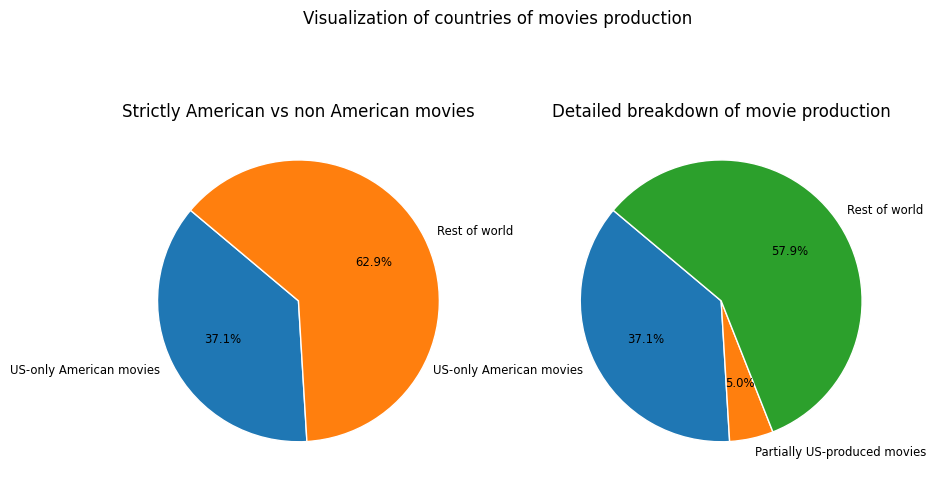

In [50]:
total_number_movies_df = df_movie_metada_full_left['name'].count() # attention faire les count sur name car on a merge là dessus avec le IMDB
# movies UNIQUELY produced in the US
total_number_US_movies = df_movie_metada_full_left[df_movie_metada_full_left['countries'] == 'United States of America']['name'].count()
total_number_non_US_movies = total_number_movies_df - total_number_US_movies

# US movies only PARTIALLY produced in the us
total_number_partial_US_movies = df_movie_metada_full_left.countries.str.contains('United States of America').sum() - total_number_US_movies
strict_rest_world_movies = total_number_movies_df - (total_number_partial_US_movies + total_number_US_movies)


print(f"The unique countries' names where movies are produced are:\n{list(df_movie_metada_full_left['countries'].unique())}")

print(f"The total number of films in the dataset is {total_number_movies_df}")
print(f"The total number of american movies uniquely produced in the US in the dataset is {total_number_US_movies}")
print(f"The total number of american movies partially produced in the US in the dataset is {total_number_partial_US_movies}")
print(f"The total number of movies strictly produced outside the US in the dataset is {strict_rest_world_movies}")

list_numbers_movies = [total_number_US_movies, total_number_non_US_movies] 
list_numbers_movies_granular = [total_number_US_movies, total_number_partial_US_movies, strict_rest_world_movies] 

fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(10, 6))
ax[0].pie(
    list_numbers_movies,
    labels= ['US-only American movies', 'Rest of world'],
    autopct='%1.1f%%',
    textprops= {'size': 'smaller'},  # Adjust text size
    startangle= 140,  # Start the chart at a different angle for better spacing
    wedgeprops= {'edgecolor': 'white'}  # Add separation between slices to make the pie chart more readable
)
ax[0].set_title("Strictly American vs non American movies")
ax[1].pie(
    list_numbers_movies_granular,
    labels= ['US-only American movies', 'Partially US-produced movies' , 'Rest of world'],
    autopct='%1.1f%%',
    textprops= {'size': 'smaller'},  # Adjust text size
    startangle= 140,  # Start the chart at a different angle for better spacing
    wedgeprops= {'edgecolor': 'white'}  # Add separation between slices to make the pie chart more readable
)
ax[1].set_title("Detailed breakdown of movie production")
fig.suptitle("Visualization of countries of movies production")
plt.show()

#### Cleaning of NaN from numerical columns and fixing date 1010 mistake in the dataset

In [51]:
# dropping line where NaN values occurs to be able to plot --> otherwise error --> TREMENDOUS DATA LOSS --> A DISCUTER

# creating new dataset to avoid messing up the original left join
all_movies = df_movie_metada_full_left.copy() # copy of original data frame to avoid messing it up
us_movies = df_movie_metada_full_left.copy() 
us_partially_movies = df_movie_metada_full_left.copy()
all_us_movies = df_movie_metada_full_left.copy()

# all movies no matter their production countries with NaN values removed
all_movies = all_movies.dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])
# movies strictly produced in the US
us_movies = us_movies[us_movies['countries'] == 'United States of America'].dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])
# movies partially produced in the US
us_partially_movies = us_partially_movies[(us_partially_movies['countries'].str.contains('United States of America') == True) & (us_partially_movies['countries'] != 'United States of America')].dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])

# contains the movies strictly produced in the US and the ones partially produced in the US
all_us_movies = all_us_movies[(all_us_movies['countries'] == 'United States of America') | (all_us_movies['countries'].str.contains('United States of America') == True)].dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])

# on perd un nombre de données HALLUCINANT AVEC LE DROPNA
print(f"strict us produced movies shape is {us_movies.shape}")
print(f"partially us produced  movies shape is {us_partially_movies.shape}")
print(f"all us produced  movies shape is {all_us_movies.shape}")
print(f"world produced movies shape is {all_movies.shape}")

# film 1010 de m****
print(df_movie_metada_full_left[df_movie_metada_full_left['release_year'] == 1010])
# correction of this flase value according to https://en.wikipedia.org/wiki/Hunting_Season_(2010_film) 
df_movie_metada_full_left[df_movie_metada_full_left['release_year'] == 1010] = 2010
df_movie_metada_full_left[df_movie_metada_full_left['release_date'] == '1010-12-02'] = '2010-12-02'


strict us produced movies shape is (2903, 13)
partially us produced  movies shape is (599, 13)
all us produced  movies shape is (3502, 13)
world produced movies shape is (3766, 13)
       wiki_movie_ID freebase_movie_ID            name release_date  \
62841       29666067        /m/0fphzrf  Hunting Season   1010-12-02   

       box_office  runtime                           languages countries  \
62841  12160978.0    140.0  Turkish Language, English Language    Turkey   

                                    genres_CMU  release_year genres_IMDB  \
62841  Crime Fiction, Mystery, Drama, Thriller          1010         NaN   

       averageRating  numVotes  
62841            NaN       NaN  


#### Box office analysis

The mean box office revenue for all the films of the dataset is 48.0 millions USD. And the standard deviation is 112.2 millions USD.
The mean box office revenue for american movies movies strictly produced in the US is 48.8 millions USD. And the standard deviation is 110.4 millions USD.
The mean box office revenue for american movies movies partially produced in the US is 72.4 millions USD. And the standard deviation is 124.8 millions USD.
The mean box office revenue for american movies movies partially produced in the US is 76.1 millions USD. And the standard deviation is 153.3 millions USD.
3766


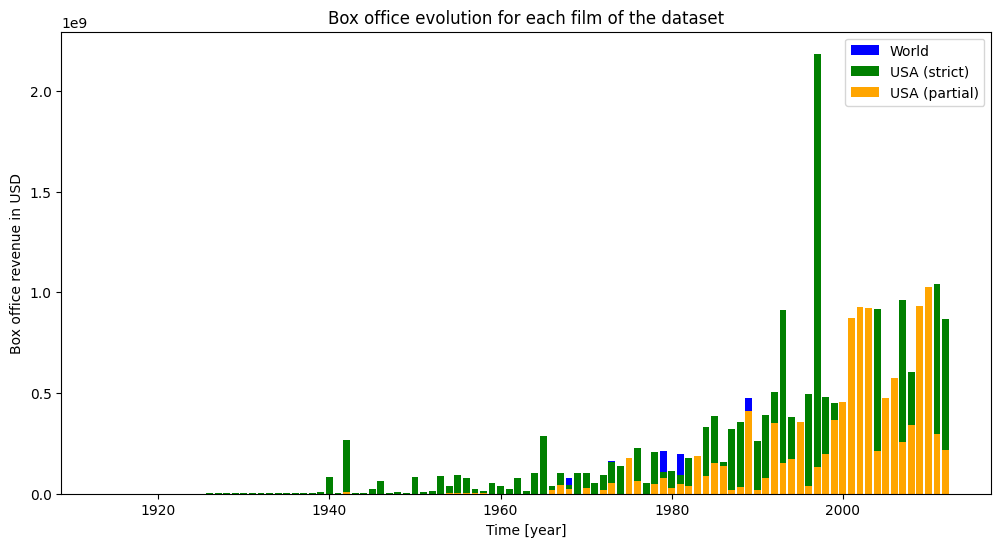

In [53]:
# whole dataset
mean_box_office_revenue = df_movie_metada_full_left['box_office'].mean(skipna = True) # since a lot of NaN values in the box office columns
std_box_office_revnue = df_movie_metada_full_left['box_office'].std(skipna = True)

# american movies STRICTLY produced in the US
mean_box_office_revenue_US = df_movie_metada_full_left[df_movie_metada_full_left['countries'] == 'United States of America']['box_office'].mean(skipna = True) # since a lot of NaN values in the box office columns
std_box_office_revenue_US = df_movie_metada_full_left[df_movie_metada_full_left['countries'] == 'United States of America']['box_office'].std(skipna = True)

# american movies PARTIALLY produced in the US
mean_box_office_revenue_US_partial = df_movie_metada_full_left[(df_movie_metada_full_left['countries'].str.contains('United States of America') == True) & (df_movie_metada_full_left['countries'] != 'United States of America')]['box_office'].mean(skipna = True) 
std_box_office_revenue_US_partial = df_movie_metada_full_left[(df_movie_metada_full_left['countries'].str.contains('United States of America') == True) & (df_movie_metada_full_left['countries'] != 'United States of America')]['box_office'].std(skipna = True)

## whole dataset
print(f"The mean box office revenue for all the films of the dataset is {mean_box_office_revenue/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revnue/(1e6):.1f} millions USD.")
## american movies movies strictly produced in the US
print(f"The mean box office revenue for american movies movies\033[1m strictly produced in the US\033[0m is {mean_box_office_revenue_US/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_US/(1e6):.1f} millions USD.")

## american movies movies partially produced in the US
print(f"The mean box office revenue for american movies movies\033[1m partially produced in the US\033[0m is {us_partially_movies['box_office'].mean()/(1e6):.1f} millions USD. And the standard deviation is {us_partially_movies['box_office'].std()/(1e6):.1f} millions USD.")
print(f"The mean box office revenue for american movies movies partially produced in the USis {mean_box_office_revenue_US_partial/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_US_partial/(1e6):.1f} millions USD.") # DIFFERENCE !!!!!!!!!!!!!!!!!!!!!

print(len(all_movies['release_year']))
# Box office time series for each films in the dataset
plt.figure(figsize=(12,6))
plt.bar(all_movies['release_year'], all_movies['box_office'], label = 'World', color = 'blue')
plt.bar(us_movies['release_year'], us_movies['box_office'], label = 'USA (strict)', color = 'green')
plt.bar(us_partially_movies['release_year'], us_partially_movies['box_office'], label = 'USA (partial)', color = 'orange')
plt.title("Box office evolution for each film of the dataset")
plt.xlabel("Time [year]")
plt.ylabel("Box office revenue in USD")
plt.legend()
plt.show()

#sns.barplot(x='release_year', y='box_office', data= all_movies)

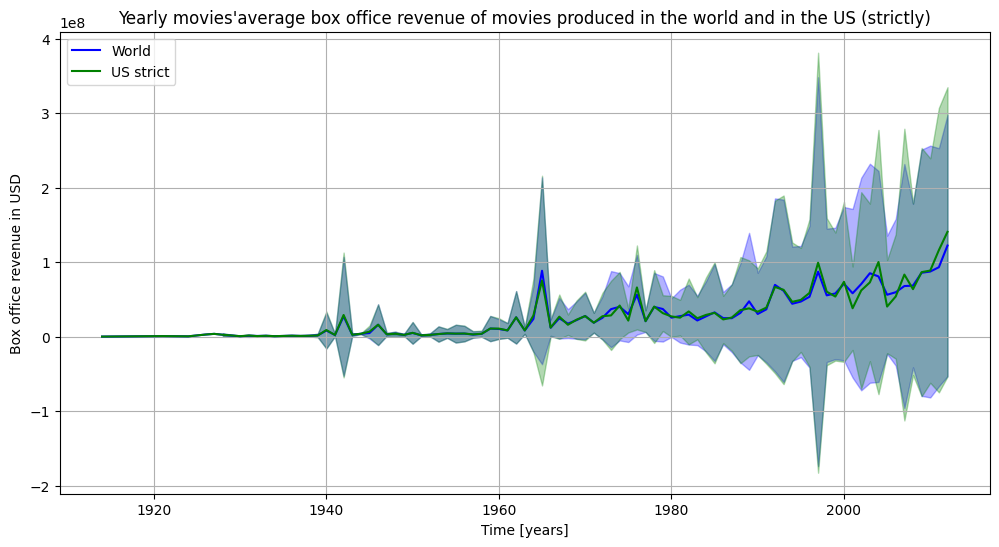

In [54]:
# average box office revenue for all movies per year world wide
avrg_world_box_office_per_year = all_movies.groupby('release_year')['box_office'].mean()
std_world_box_office_per_year = all_movies.groupby('release_year')['box_office'].std()

# average box office revenue for all movies per year in the US (movies STRICTLY produced in the US)
avrg_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].mean()
std_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].std()

# average box office revenue for all movies per year in the US (movies PARTIALLY produced in the US)
avrg_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].mean()
std_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].std()


plt.figure(figsize=(12,6))
# world
plt.plot(all_movies['release_year'].drop_duplicates().sort_values(), avrg_world_box_office_per_year, label = 'World', color='blue')
plt.fill_between(all_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_world_box_office_per_year - std_world_box_office_per_year, y2 =avrg_world_box_office_per_year + std_world_box_office_per_year, linestyle='-', color='blue', alpha=0.3)
# Us strict
plt.plot(us_movies['release_year'].drop_duplicates().sort_values(), avrg_us_box_office_per_year, label = 'US strict', color='green')
plt.fill_between(us_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_us_box_office_per_year - std_us_box_office_per_year, y2 = avrg_us_box_office_per_year + std_us_box_office_per_year, linestyle='-', color='green', alpha=0.3)
# us partial
# plt.plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), avrg_us_partial_box_office_per_year, label = 'US partial', color = 'orange')
# plt.fill_between(us_partially_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_us_partial_box_office_per_year - std_us_partial_box_office_per_year, y2 = avrg_us_partial_box_office_per_year + std_us_partial_box_office_per_year, linestyle='-', color='orange', alpha=0.3)

plt.title("Yearly movies'average box office revenue of movies produced in the world and in the US (strictly)")
plt.xlabel("Time [years]")
plt.ylabel("Box office revenue in USD")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

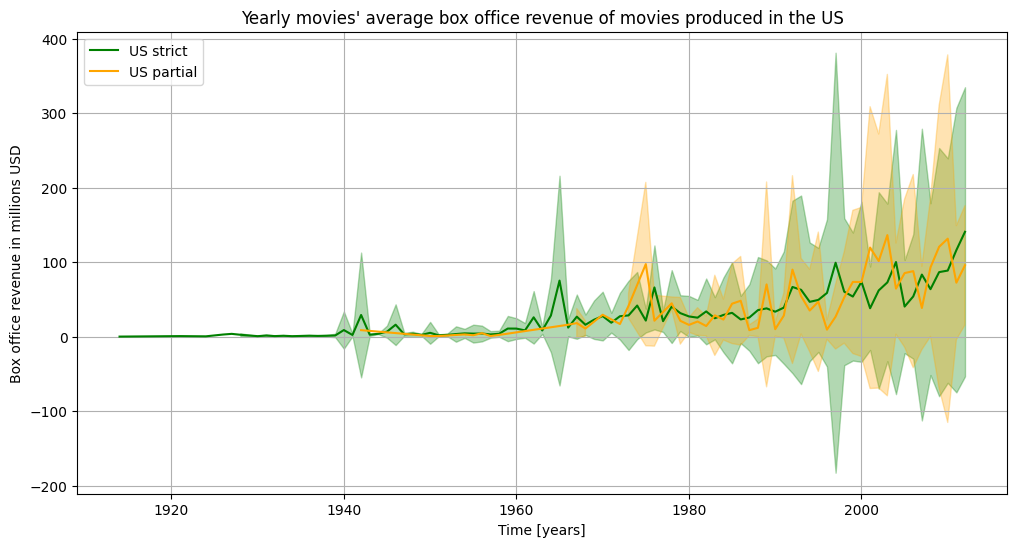

In [57]:
plt.figure(figsize=(12,6))
# Us strict
plt.plot(us_movies['release_year'].drop_duplicates().sort_values(), avrg_us_box_office_per_year/(1e6), label = 'US strict', color='green')
plt.fill_between(us_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= (avrg_us_box_office_per_year - std_us_box_office_per_year)/(1e6), y2 = (avrg_us_box_office_per_year + std_us_box_office_per_year)/(1e6), linestyle='-', color='green', alpha=0.3)
# us partial
plt.plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), avrg_us_partial_box_office_per_year/(1e6), label = 'US partial', color = 'orange')
plt.fill_between(us_partially_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= (avrg_us_partial_box_office_per_year - std_us_partial_box_office_per_year)/(1e6), y2 = (avrg_us_partial_box_office_per_year + std_us_partial_box_office_per_year)/(1e6), linestyle='-', color='orange', alpha=0.3)

plt.title("Yearly movies' average box office revenue of movies produced in the US")
plt.xlabel("Time [years]")
plt.ylabel("Box office revenue in millions USD")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

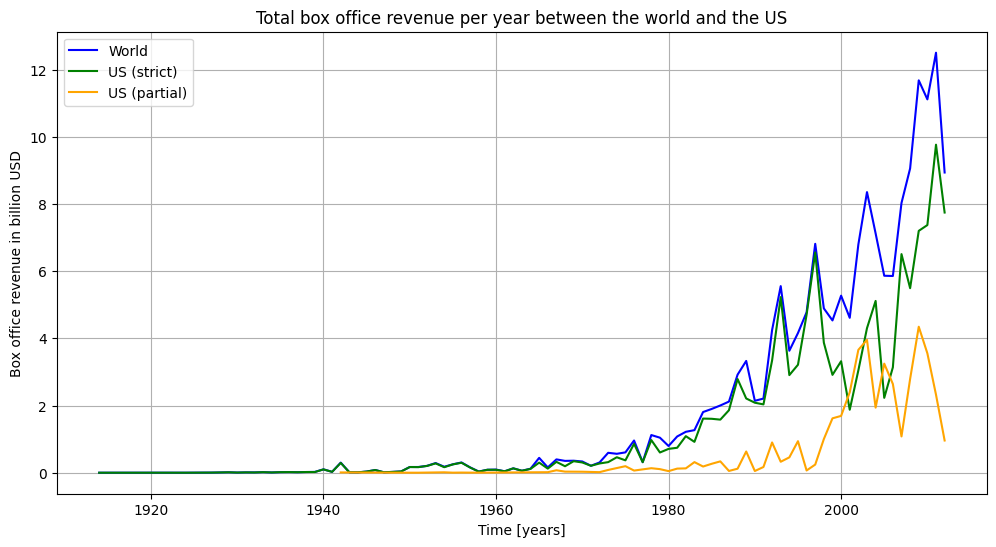

In [58]:
# total box office revnue generated by US movies each year
world_box_office_per_year = all_movies.groupby('release_year')['box_office'].sum()
# total box office revnue generated by US produced (STRICTLY) movies each year
us_box_office_per_year = us_movies.groupby('release_year')['box_office'].sum()
# total box office revnue generated by US produced (PARTIALLY) movies each year
us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].sum()

plt.figure(figsize=(12,6))
plt.plot(all_movies['release_year'].drop_duplicates().sort_values(), world_box_office_per_year/(1e9), label = 'World', color = 'blue')
plt.plot(us_movies['release_year'].drop_duplicates().sort_values(), us_box_office_per_year/(1e9), label = 'US (strict)', color = 'green')
plt.plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), us_partial_box_office_per_year/(1e9), label = 'US (partial)', color = 'orange')
plt.title("Total box office revenue per year between the world and the US")
plt.xlabel("Time [years]")
plt.ylabel("Box office revenue in billion USD")
plt.legend()
plt.grid()
plt.show()

#### Runtime analysis

The mean movie runtime over the whole dataset is 111.8 minutes which correspondonds to 1 hour 52 minutes.
The mean movie runtime for american movies is 128.3 minutes which correspondonds to 2 hour 68 minutes.
The mean movie runtime for american movies is 101.3 minutes which correspondonds to 1 hour 41 minutes.


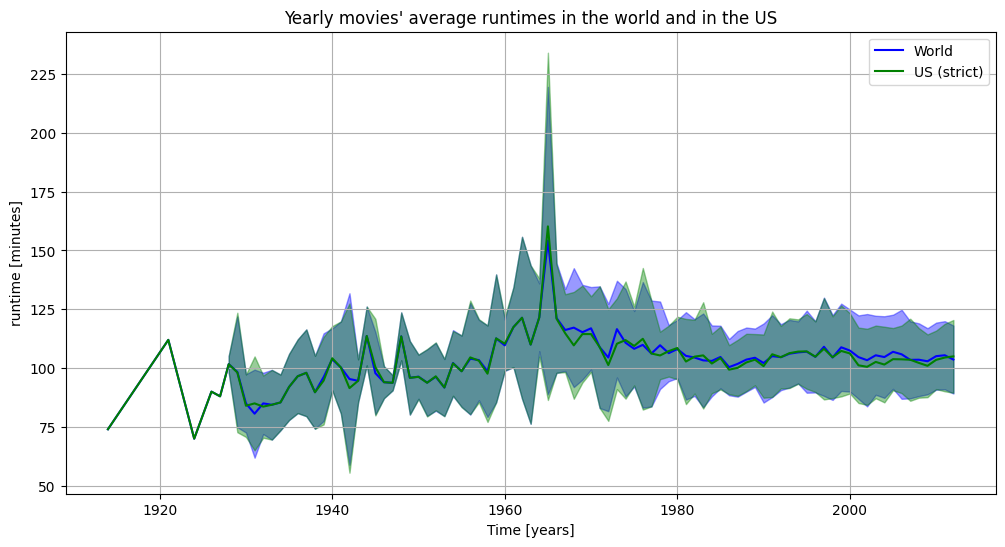

In [59]:
# whole dataset
mean_runtime = df_movie_metada_full_left['runtime'].mean(skipna = True)
std_runtime = df_movie_metada_full_left['runtime'].std(skipna = True)

# american movies STRICTLY produced in the US
mean_runtime_US = df_movie_metada_full_left[df_movie_metada_full_left['countries'] == 'United States of America']['runtime'].mean(skipna = True)
std_runtime_US = df_movie_metada_full_left[df_movie_metada_full_left['countries'] == 'United States of America']['runtime'].std(skipna = True)

# american movies PARTIALLY produced in the US
mean_runtime_US_partial = df_movie_metada_full_left[(df_movie_metada_full_left['countries'].str.contains('United States of America') == True) & (df_movie_metada_full_left['countries'] != 'United States of America')]['runtime'].mean(skipna = True)
std_runtime_US_partial = df_movie_metada_full_left[(df_movie_metada_full_left['countries'].str.contains('United States of America') == True) & (df_movie_metada_full_left['countries'] != 'United States of America')]['runtime'].std(skipna = True)

print(f"The mean movie runtime over the whole dataset is {mean_runtime:.1f} minutes which correspondonds to {math.floor((mean_runtime/60))} hour {((mean_runtime/60) - 1)*60:.0f} minutes.")
print(f"The mean movie runtime for american movies\033[1m strictly produced in the US\033[0m is {mean_runtime_US:.1f} minutes which correspondonds to {math.floor((mean_runtime_US/60))} hour {((mean_runtime_US/60) - 1)*60:.0f} minutes.")
print(f"The mean movie runtime for american movies\033[1m partially produced in the US\033[0m is {mean_runtime_US_partial:.1f} minutes which correspondonds to {math.floor((mean_runtime_US_partial/60))} hour {((mean_runtime_US_partial/60) - 1)*60:.0f} minutes.")

# whole dataset
avrg_world_runtime_per_year = all_movies.groupby('release_year')['runtime'].mean()
std_world_runtime_per_year = all_movies.groupby('release_year')['runtime'].std()

# american movies STRICTLY produced in the US
avrg_us_runtime_per_year = us_movies.groupby('release_year')['runtime'].mean()
std_us_runtime_per_year = us_movies.groupby('release_year')['runtime'].std()

# american movies PARTIALLY produced in the US
avrg_us_partial_runtime_per_year = us_partially_movies.groupby('release_year')['runtime'].mean()
std_us_partial_runtime_per_year = us_partially_movies.groupby('release_year')['runtime'].std()


plt.figure(figsize=(12,6))
plt.plot(all_movies['release_year'].drop_duplicates().sort_values(), avrg_world_runtime_per_year, label = 'World', color = 'blue')
plt.fill_between(all_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_world_runtime_per_year - std_world_runtime_per_year, y2 =avrg_world_runtime_per_year + std_world_runtime_per_year, linestyle='-', color='blue', alpha=0.4)
plt.plot(us_movies['release_year'].drop_duplicates().sort_values(), avrg_us_runtime_per_year, label = 'US (strict)', color = 'green')
plt.fill_between(us_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_us_runtime_per_year - std_us_runtime_per_year, y2 = avrg_us_runtime_per_year + std_us_runtime_per_year, linestyle='-', color='green', alpha=0.4)
plt.title("Yearly movies' average runtimes in the world and in the US")
plt.xlabel("Time [years]")
plt.ylabel("runtime [minutes]")
plt.legend()
plt.grid()
plt.show()

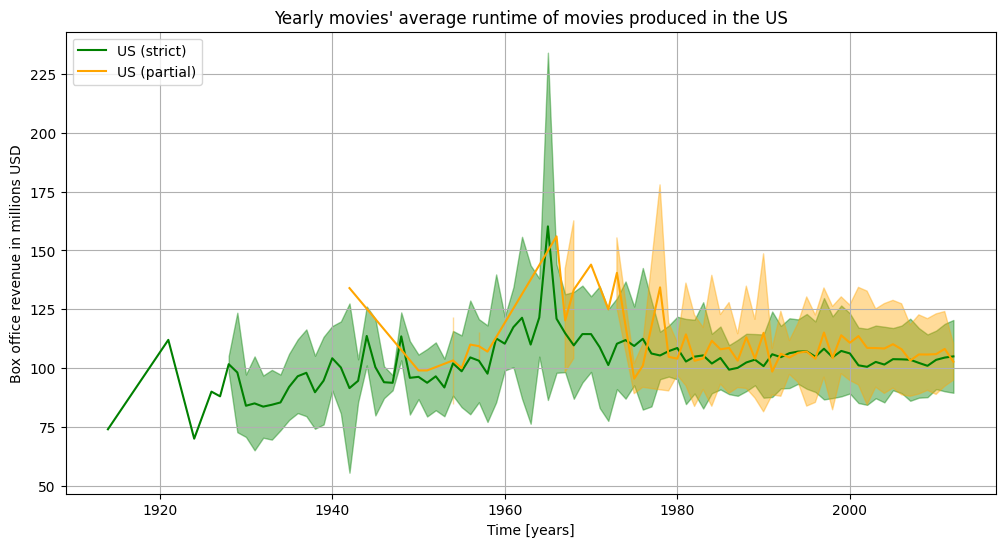

In [62]:
plt.figure(figsize=(12,6))
# Us strict
plt.plot(us_movies['release_year'].drop_duplicates().sort_values(),avrg_us_runtime_per_year, label = 'US (strict)', color = 'green')
plt.fill_between(us_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_us_runtime_per_year - std_us_runtime_per_year, y2 = avrg_us_runtime_per_year + std_us_runtime_per_year, linestyle='-', color='green', alpha=0.4)
# us partial
plt.plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), avrg_us_partial_runtime_per_year, label = 'US (partial)', color = 'orange')
plt.fill_between(us_partially_movies['release_year'].drop_duplicates().sort_values().astype(int), y1= avrg_us_partial_runtime_per_year - std_us_partial_runtime_per_year, y2 = avrg_us_partial_runtime_per_year + std_us_partial_runtime_per_year, linestyle='-', color='orange', alpha=0.4)

plt.title("Yearly movies' average runtime of movies produced in the US")
plt.xlabel("Time [years]")
plt.ylabel("Box office revenue in millions USD")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

#### Movie ratings analysis

##### Box office vs IMDB ratings for US Movies

averageRating    float64
box_office       float64
dtype: object
       averageRating   box_office
0                4.9   14010832.0
7                6.8    3600000.0
17               7.8  102272727.0
36               6.0     932000.0
54               5.5    3416846.0
...              ...          ...
81641            7.1    2549605.0
81664            6.5  494471524.0
81702            7.1  288752301.0
81727            5.3   15369573.0
81733            5.7   22886222.0

[2903 rows x 2 columns]


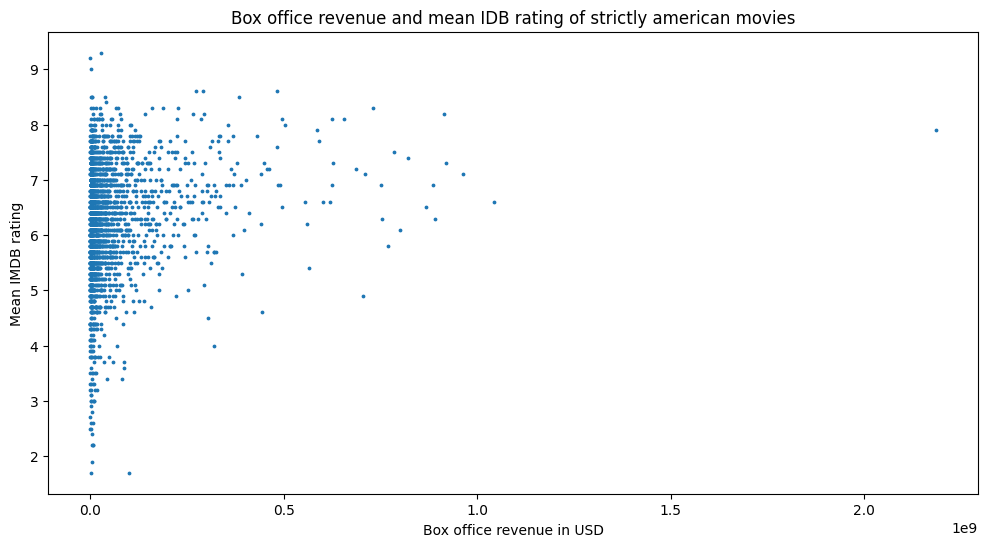

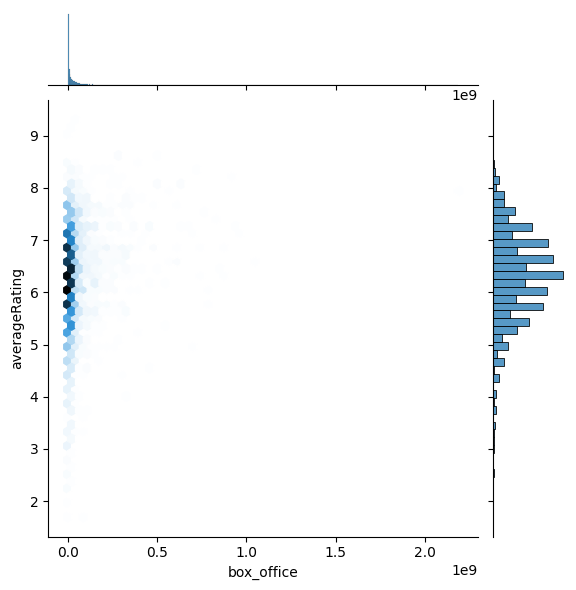

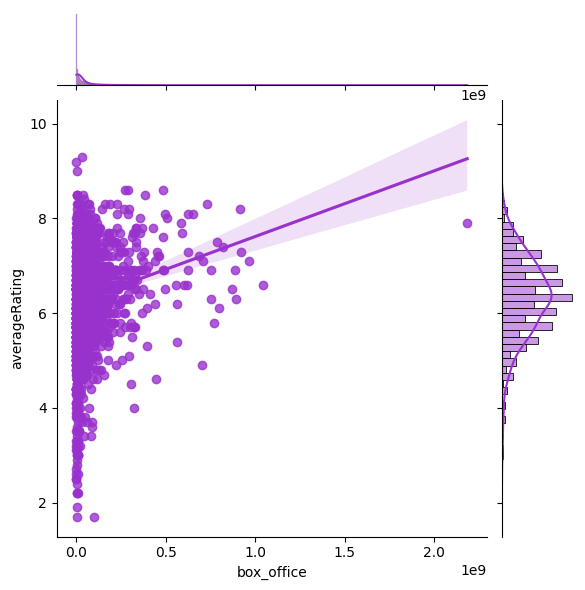

In [66]:
box_ratings_US_movies = us_movies[['averageRating', 'box_office']]
print(box_ratings_US_movies.dtypes)
print(box_ratings_US_movies)

plt.figure(figsize=(12,6))
plt.scatter(box_ratings_US_movies['box_office'], box_ratings_US_movies['averageRating'], s = 3)
plt.title("Box office revenue and mean IDB rating of strictly american movies")
plt.xlabel("Box office revenue in USD")
plt.ylabel("Mean IMDB rating")
plt.show()

sns.jointplot(x= box_ratings_US_movies['box_office'], y= box_ratings_US_movies['averageRating'], kind="hex")

sns.jointplot(x= box_ratings_US_movies['box_office'], y= box_ratings_US_movies['averageRating'], kind="reg", color = 'darkorchid')

##### Runtime vs IMDB ratings for US Movies

runtime          float64
averageRating    float64
dtype: object
       runtime  averageRating
0         98.0            4.9
7        106.0            6.8
17       139.0            7.8
36        96.0            6.0
54        97.0            5.5
...        ...            ...
81641     99.0            7.1
81664    113.0            6.5
81702    117.0            7.1
81727    100.0            5.3
81733    107.0            5.7

[2903 rows x 2 columns]


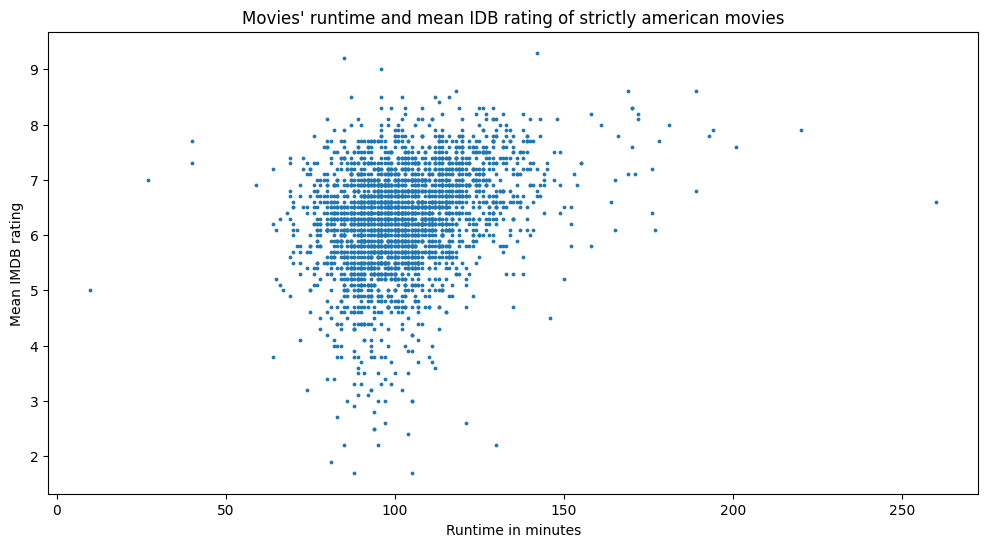

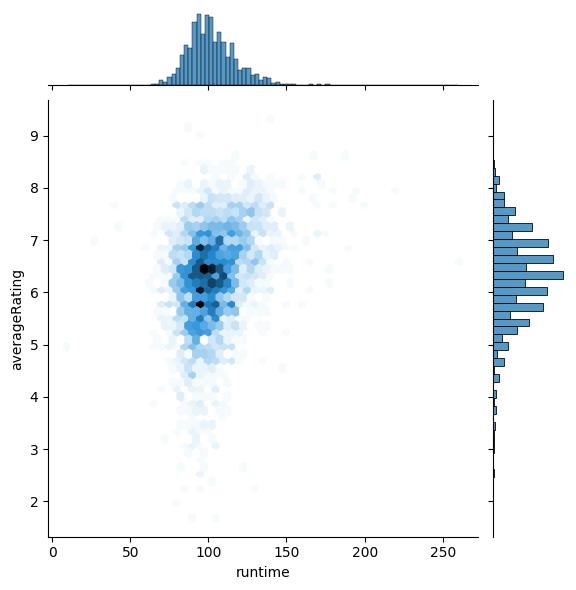

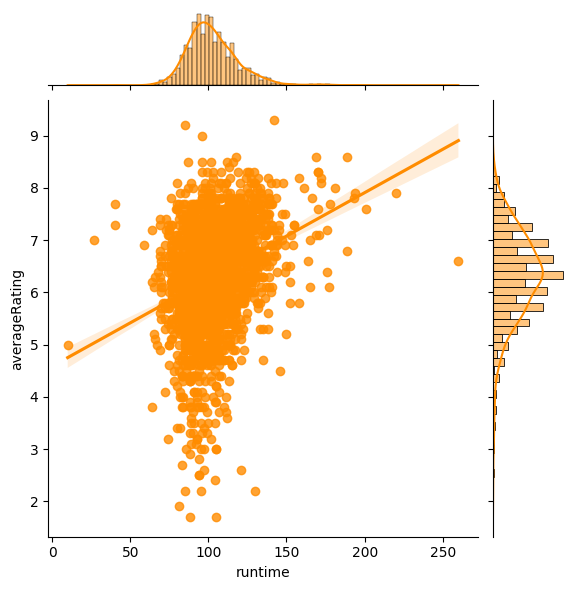

In [64]:
runtime_ratings_US_movies = us_movies[['runtime','averageRating']]
print(runtime_ratings_US_movies.dtypes)
print(runtime_ratings_US_movies)

plt.figure(figsize=(12,6))
plt.scatter(runtime_ratings_US_movies['runtime'], runtime_ratings_US_movies['averageRating'], s = 3)
plt.title("Movies' runtime and mean IDB rating of strictly american movies")
plt.xlabel("Runtime in minutes")
plt.ylabel("Mean IMDB rating")
plt.show()

sns.jointplot(x= runtime_ratings_US_movies['runtime'], y= runtime_ratings_US_movies['averageRating'], kind="hex")

sns.jointplot(x= runtime_ratings_US_movies['runtime'], y= runtime_ratings_US_movies['averageRating'], kind="reg", color = 'darkorange')

##### Runtime vs box office ratings for US Movies

box_office    float64
runtime       float64
dtype: object
        box_office  runtime
0       14010832.0     98.0
7        3600000.0    106.0
17     102272727.0    139.0
36        932000.0     96.0
54       3416846.0     97.0
...            ...      ...
81641    2549605.0     99.0
81664  494471524.0    113.0
81702  288752301.0    117.0
81727   15369573.0    100.0
81733   22886222.0    107.0

[2903 rows x 2 columns]


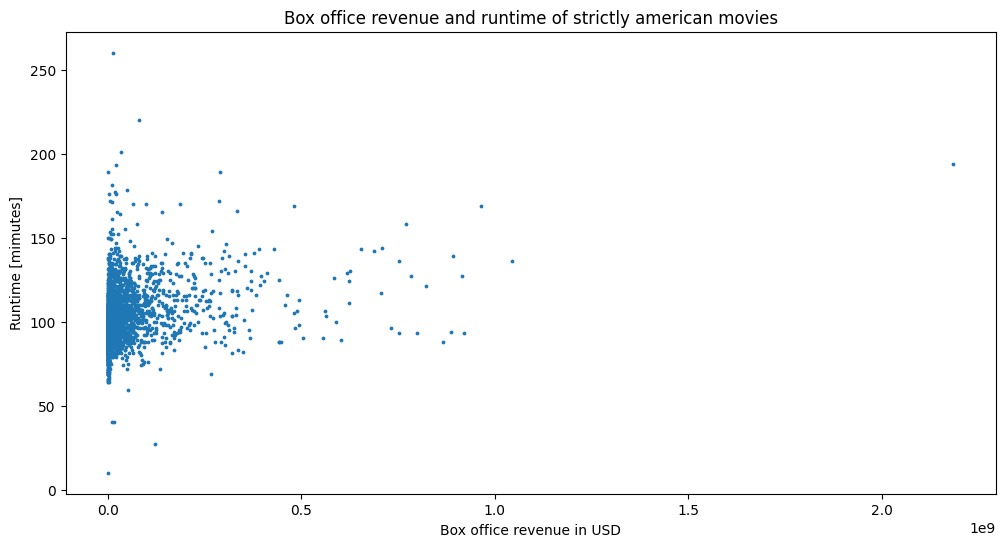

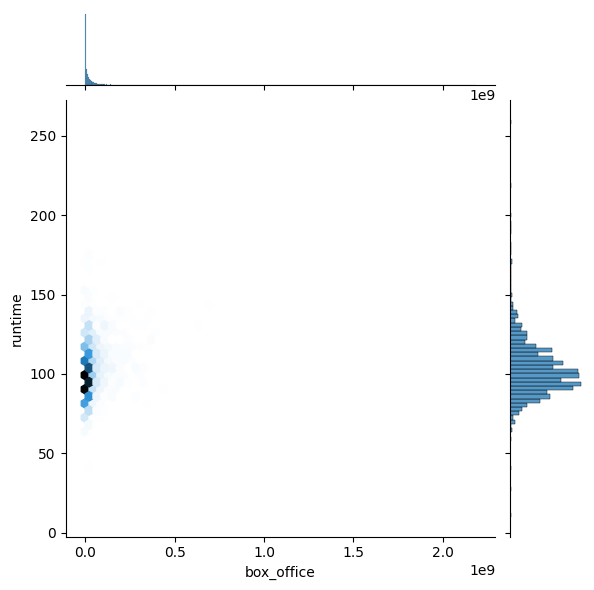

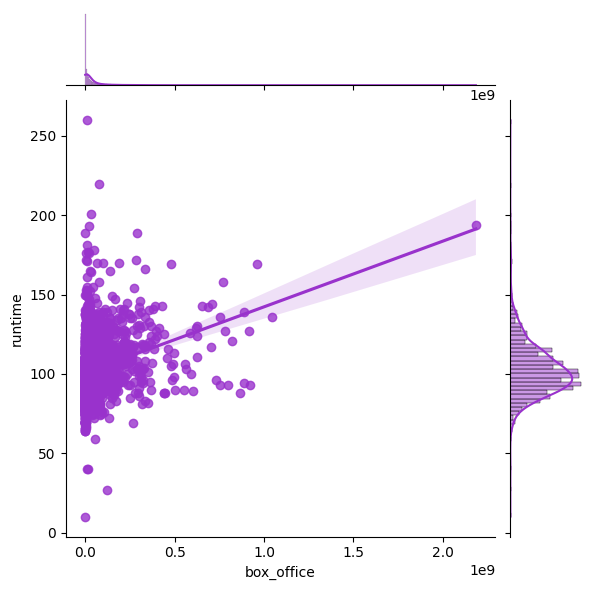

In [67]:
box_runtime_US_movies = us_movies[['box_office', 'runtime']]
print(box_runtime_US_movies.dtypes)
print(box_runtime_US_movies)

plt.figure(figsize=(12,6))
plt.scatter(box_runtime_US_movies['box_office'], box_runtime_US_movies['runtime'], s = 3)
plt.title("Box office revenue and runtime of strictly american movies")
plt.xlabel("Box office revenue in USD")
plt.ylabel("Runtime [mimutes]")
plt.show()

sns.jointplot(x= box_runtime_US_movies['box_office'], y= box_runtime_US_movies['runtime'], kind="hex")

sns.jointplot(x= box_runtime_US_movies['box_office'], y= box_runtime_US_movies['runtime'], kind="reg", color = 'darkorchid')

### Genres' diversity analysis 

##############################################################################################################################################################################################################################################################################################

# Volume analysis of american cinema industry using the CSV movie_metadata cretaed using the data_cleaner.py

### Opening of the movie_metadata_CMU_IMDB.cvs and the plot_summaries.csv

In [27]:
df_movie_metadata_CMU_IMDB = pd.read_csv("data/movie_metadata_CMU_IMDB.csv", delimiter= ',')

df_plot_summaries = pd.read_csv("data/plot_summaries_CMU.csv", delimiter= ',')

#df_movie_metadata_CMU_IMDB['release_year'].astype("Int64", errors= 'ignore')

df_movie_metadata_CMU_IMDB.head() # colonnes pas dans bon ordre + les relase years sont des floats

,wiki_movie_ID,freebase_movie_ID,title,release_date,box_office,runtime,languages,countries,genres_CMU,release_year,genres_IMDB,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001.0,"Action,Horror,Sci-Fi",4.9,58741.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenet Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000.0,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama",1988.0,"Crime,Drama",5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987.0,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983.0,NaN,NaN,NaN


#### Verification if strange values have been removed in movie_metadata_CMU_IMDB.csv

In [11]:
print(f"Movies relase dates ranges between {df_movie_metadata_CMU_IMDB['release_year'].min()} and {df_movie_metadata_CMU_IMDB['release_year'].max()}.")

print(f"Box office revenue ranges between {df_movie_metadata_CMU_IMDB['box_office'].min()} and {df_movie_metadata_CMU_IMDB['box_office'].max()}.")

print(f"The runtime ranges between {df_movie_metadata_CMU_IMDB['runtime'].min()} and {df_movie_metadata_CMU_IMDB['runtime'].max()} minutes.")

print(f"verification of runtime of film Zero Tolerance: \n{df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['title'] == 'Zero Tolerance']['runtime']}") # a bien été corrigé
print(f"verification of runtime of film Paradise in Harlem: \n{df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['title'] == 'Paradise in Harlem']['runtime']}") # a bien été corrigé

movies_longer_3H = df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['runtime'] > 180.0]['runtime'].count()

print(f"Number of films lasting more than 3 hours (180 minutes) in the dataset: {movies_longer_3H} which corresponds to {(movies_longer_3H/len(df_movie_metadata_CMU_IMDB))*100} % of the dataset.")

#print(df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['runtime'] == 14400.0][['title', 'release_date']]) 

pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.width', None)     # Adjust width to avoid line breaks

df_movie_metadata_CMU_IMDB[['runtime', 'title', 'release_year', 'release_date', 'box_office']].sort_values(ascending= False, by = 'runtime').head(55)

# Modern Times Forever --> # c'est un film réel qui dure 10 jours https://en.wikipedia.org/wiki/Modern_Times_Forever_(Stora_Enso_Building,_Helsinki) 
# cinématon exists : 157 hours = 9420 minutes according to wikipedia --> https://en.wikipedia.org/wiki/Cin%C3%A9maton 
# matrojska exists: 95 hours = 5700 minutes --> https://en.wikipedia.org/wiki/Matrjoschka 
# The cure for insomnia https://en.wikipedia.org/wiki/The_Cure_for_Insomnia correct runtime
# The Longest Most Meaningless Movie in the World https://en.wikipedia.org/wiki/The_Longest_Most_Meaningless_Movie_in_the_World correct runtime
# The Burning of the Red Lotus Temple https://en.wikipedia.org/wiki/The_Burning_of_the_Red_Lotus_Temple correct runtime
# crude Oil https://en.wikipedia.org/wiki/Crude_Oil_(film) correct runtime
# How Yukong Moved the Mountains https://en.wikipedia.org/wiki/How_Yukong_Moved_the_Mountains correct runtime
# TASS Is Authorized to Declare https://en.wikipedia.org/wiki/TASS_Is_Authorized_to_Declare... correct runtime
# Check the Gate: Putting Beckett on Film https://en.wikipedia.org/wiki/Beckett_on_Film correct runtime
# Evolution of a Filipino Family https://en.wikipedia.org/wiki/Evolution_of_a_Filipino_Family more or less correct runtime
# Soldiers of freedom https://en.wikipedia.org/wiki/Soldiers_of_Freedom correct runtime
# Tie Xi Qu: West of the Tracks https://en.wikipedia.org/wiki/Tie_Xi_Qu:_West_of_the_Tracks correct runtime
# Shoah https://en.wikipedia.org/wiki/Shoah_(film) more or less correct runtime
# Heremias https://en.wikipedia.org/wiki/Heremias more or less correct runtime
# Empire https://www.imdb.com/title/tt0196530/ correct runtime
# Hitler: A Film from Germany https://en.wikipedia.org/wiki/Hitler:_A_Film_from_Germany correct runtime
# 
# MINI SERIES PROBLEM
# https://en.wikipedia.org/wiki/Unsung_Heroes --> runtime 1315 minutes donc proche des 1440 minutes dans CMU 
# https://en.wikipedia.org/wiki/Swallow_the_Sun 
# Heimat --> 59.5 hours according to https://en.wikipedia.org/wiki/Heimat_(film_series) 
# https://en.wikipedia.org/wiki/Gigantor 
# https://en.wikipedia.org/wiki/Rich_Man,_Poor_Man_(miniseries) 
# The National Parks: America's Best Idea https://en.wikipedia.org/wiki/The_National_Parks:_America%27s_Best_Idea correct runtime 
# Broken Saints	https://en.wikipedia.org/wiki/Broken_Saints 
# Liquidation https://en.wikipedia.org/wiki/Liquidation_(miniseries) correct runtime
# The Civil War	 https://en.wikipedia.org/wiki/The_Civil_War_(miniseries) more or less correct 690' instead of 608
# Band of Brothers https://en.wikipedia.org/wiki/Band_of_Brothers_(miniseries)
# https://en.wikipedia.org/wiki/New_York:_A_Documentary_Film sorte de documentaire en plusieurs episodes
# https://www.imdb.com/title/tt6359534/ more or less correct runtime
# https://www.rogerebert.com/reviews/great-movie-the-decalogue-1988 sorte de tV series
# https://en.wikipedia.org/wiki/Backstairs_at_the_White_House mini series
# https://en.wikipedia.org/wiki/WrestleMania_22 serie de catch
# https://en.wikipedia.org/wiki/Once_an_Eagle_(miniseries) correct runtime
# https://en.wikipedia.org/wiki/October_1970_(film) correct runtime
# https://en.wikipedia.org/wiki/Teresa_de_Jes%C3%BAs correct runtime
# https://www.imdb.com/title/tt0088635/ tv miniseries 
# https://en.wikipedia.org/wiki/Ways_across_the_Country tv mini series 

# STRANGE FILMS 
# Vileness Fats	is an unfinished film but here it's 840 minutes long https://en.wikipedia.org/wiki/Vileness_Fats but here it has 2 version one of 17 and one of 30 minutes
# 
# Paradise in Harlem not correct: release year = 1939 and runtime = 85 minutes rather than 5100
# Kai Koduttha Dheivam runtime is false: not 4875.27 but rather --> 164 minutes https://en.wikipedia.org/wiki/Kai_Kodutha_Deivam 
# Dil Ne Phir Yaad Kiya runtime is wrong: not 1966 but rather --> 147 https://www.imdb.com/title/tt0371636/ 
# Dhool Ka Phool runtime is wrong: not 1533 but rather --> 153 https://en.wikipedia.org/wiki/Dhool_Ka_Phool
# Thiruthani date and runtime not correct --> 2012 and 145 minutes https://en.wikipedia.org/wiki/Thiruthani_(film)
# Rebound runtime not correct --> rather 103 minutes https://en.wikipedia.org/wiki/Rebound_(2005_film) 
# Backfire runtime not correct --> rather 91 minutes https://en.wikipedia.org/wiki/Backfire_(1950_film) 
# First Yank into Tokyo not correct: not 822 but rather 82 minutes https://en.wikipedia.org/wiki/First_Yank_into_Tokyo 

Movies relase dates ranges between 1888.0 and 2016.0.
Box office revenue ranges between 10000.0 and 2782275172.0.
The runtime ranges between 0.0 and 14400.0 minutes.
verification of runtime of film Zero Tolerance: 
12804    94.0
Name: runtime, dtype: float64
verification of runtime of film Paradise in Harlem: 
16316    85.0
Name: runtime, dtype: float64
Number of films lasting more than 3 hours (180 minutes) in the dataset: 806 which corresponds to 0.985956842980868 % of the dataset.


,runtime,title,release_year,release_date,box_office
62967,14400.0,Modern Times Forever,NaN,NaN,NaN
71106,9360.0,Cinematon,2011.0,2011,NaN
21735,5700.0,Matrjoschka,2006.0,2006-04-23,NaN
46671,5220.0,The Cure for Insomnia,1987.0,1987-01-31,NaN
68229,2880.0,The Longest Most Meaningless Movie in the World,1968.0,1968,NaN
73664,2425.0,Gigantor,1963.0,1963-10-20,NaN
30262,1620.0,The Burning of the Red Lotus Temple,1928.0,1928-05-13,NaN
23846,1560.0,Swallow the Sun,2009.0,2009,NaN
54980,1530.0,The New Adventures of Gigantor,1980.0,1980-10-03,NaN
70961,1200.0,Unsung Heroes,1978.0,1978,NaN


#### Hypoethesis before starting the analysis

**Hypothesis**
- Runtimes
    - one chooses to discard the films lasting more than 180 minutes (3h) since they represent only about 1 % of the dataset (see below).
        - some films exits but are extremely long as for example *Modern Times Forever* that last 10 days (14'400 minutes) (see https://en.wikipedia.org/wiki/Modern_Times_Forever_(Stora_Enso_Building,_Helsinki))
    - **discard movies lasting less than 60' ???**

In [28]:
movies_longer_3h = df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['runtime'] > 180.0]['runtime'].count()
movies_shorter_1h = df_movie_metadata_CMU_IMDB[df_movie_metadata_CMU_IMDB['runtime'] < 60.0]['runtime'].count()

print(f"Number of films lasting more than 3 hours (180 minutes) in the dataset: {movies_longer_3h} which corresponds to {(movies_longer_3h/len(df_movie_metadata_CMU_IMDB))*100:.2f} % of the dataset ({len(df_movie_metadata_CMU_IMDB)} lines in total).")
print(f"Number of films lasting less than 1 hour (60 minutes) in the dataset: {movies_shorter_1h} which corresponds to {(movies_shorter_1h/len(df_movie_metadata_CMU_IMDB))*100:.2f} % of the dataset ({len(df_movie_metadata_CMU_IMDB)} lines in total).")

Number of films lasting more than 3 hours (180 minutes) in the dataset: 806 which corresponds to 0.99 % of the dataset (81748 lines in total).
Number of films lasting less than 1 hour (60 minutes) in the dataset: 6774 which corresponds to 8.29 % of the dataset (81748 lines in total).


In [29]:
nan_number_all_movies_runtime = df_movie_metadata_CMU_IMDB['runtime'].isna().sum(axis = 0)
# nan_number_US_movies_runtime = df_movie_metadata_CMU_IMDB['runtime'].isna().sum(axis = 0)
# nan_number_partially_US_movies_runtime = df_movie_metadata_CMU_IMDB['runtime'].isna().sum(axis = 0)
# nan_number_ROW_runtime = df_movie_metadata_CMU_IMDB['runtime'].isna().sum(axis = 0)
print(nan_number_all_movies_runtime)
print(f"Proportion of NaN runtime values in the whole dataset: {(nan_number_all_movies_runtime/len(all_movies))*100:.2f} %.")
# print(f"Proportion of NaN box runtime values for US-only produced movies : {(nan_number_US_movies_runtime/len(us_movies))*100:.2f} %.")
# print(f"Proportion of NaN box runtime values for US-only produced movies : {(nan_number_partially_US_movies_runtime/len(us_partially_movies))*100:.2f} %.")
# print(f"Proportion of NaN box runtime values for non-US (ROW) produced movies : {(nan_number_ROW_runtime/len(rest_world_non_US))*100:.2f} %.")

20452
Proportion of NaN runtime values in the whole dataset: 33.81 %.


In [30]:
## discard the films longer than 180 minutes.It automatically discards the NaN values also since they don't "meet" de below condition
df_movie_metadata_CMU_IMDB = df_movie_metadata_CMU_IMDB[(df_movie_metadata_CMU_IMDB['runtime'] <= 180.0)] # & (df_movie_metadata_CMU_IMDB['runtime'] >= 60.0)]
df_movie_metadata_CMU_IMDB

,wiki_movie_ID,freebase_movie_ID,title,release_date,box_office,runtime,languages,countries,genres_CMU,release_year,genres_IMDB,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001.0,"Action,Horror,Sci-Fi",4.9,58741.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenet Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000.0,NaN,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama",1988.0,"Crime,Drama",5.6,42.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987.0,NaN,NaN,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81743,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011.0,NaN,NaN,NaN
81744,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland, United Kingdom","Biographical film, Drama, Documentary",2011.0,NaN,NaN,NaN
81745,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire, Comedy",1972.0,Comedy,5.9,117.0
81746,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Science Fiction, Japanese Movies, Adventure, A...",1992.0,NaN,NaN,NaN


Number of american movies in the dataset

In [31]:
# Creating copies of original data frame to avoid messing it up
all_movies = df_movie_metadata_CMU_IMDB.copy() # all movies in the dataset, no matter their production country
us_movies = df_movie_metadata_CMU_IMDB.copy() 
us_partially_movies = df_movie_metadata_CMU_IMDB.copy()
all_us_movies = df_movie_metadata_CMU_IMDB.copy()
rest_world_non_US = df_movie_metadata_CMU_IMDB.copy()

# all movies no matter their production countries with NaN values removed
#all_movies = all_movies.dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])
# movies strictly produced in the US
us_movies = us_movies[us_movies['countries'] == 'United States of America']#.dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])
# movies partially produced in the US
us_partially_movies = us_partially_movies[(us_partially_movies['countries'].str.contains('United States of America') == True) & (us_partially_movies['countries'] != 'United States of America')]#.dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])

# contains the movies strictly produced in the US and the ones partially produced in the US
all_us_movies = all_us_movies[(all_us_movies['countries'] == 'United States of America') | (all_us_movies['countries'].str.contains('United States of America') == True)]#.dropna(subset=['release_year', 'box_office', 'runtime', 'averageRating'])

rest_world_non_US = rest_world_non_US[(rest_world_non_US['countries'].str.contains('United States of America') == False) & (rest_world_non_US['countries'] != 'United States of America')]

The total number of films in the dataset is 81748
The total number of american movies uniquely produced in the US in the dataset is 30302
The total number of american movies partially produced in the US in the dataset is 4109
The total number of movies strictly produced outside the US in the dataset is 47337


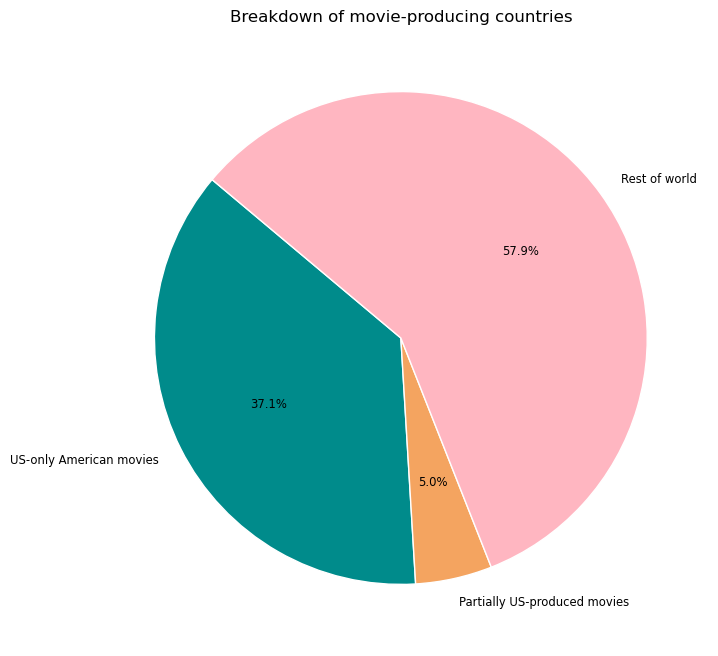

In [ ]:
total_number_movies_df = all_movies['title'].count()
# movies UNIQUELY produced in the US
total_number_US_movies = us_movies['countries'].count()
total_number_non_US_movies = total_number_movies_df - total_number_US_movies

# US movies only PARTIALLY produced in the us
total_number_partial_US_movies = df_movie_metadata_CMU_IMDB.countries.str.contains('United States of America').sum() - total_number_US_movies
strict_rest_world_movies = total_number_movies_df - (total_number_partial_US_movies + total_number_US_movies)


#print(f"The unique countries' names where movies are produced are:\n{list(df_movie_metadata_CMU_IMDB['countries'].unique())}")

print(f"The total number of films in the dataset is {total_number_movies_df}")
print(f"The total number of american movies uniquely produced in the US in the dataset is {total_number_US_movies}")
print(f"The total number of american movies partially produced in the US in the dataset is {total_number_partial_US_movies}")
print(f"The total number of movies strictly produced outside the US in the dataset is {strict_rest_world_movies}")


list_numbers_movies_granular = [total_number_US_movies, total_number_partial_US_movies, strict_rest_world_movies] 

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(
    list_numbers_movies_granular,
    labels= ['US-only American movies', 'Partially US-produced movies' , 'Rest of world'],
    autopct='%1.1f%%',
    colors = ['darkcyan', 'sandybrown', 'lightpink'],
    textprops= {'size': 'smaller'},  # Adjust text size
    startangle= 140,  # Start the chart at a different angle for better spacing
    wedgeprops= {'edgecolor': 'white'}  # white separation between slices to make the pie chart more readable
)
plt.title("Breakdown of movie-producing countries")
plt.show()

#list_numbers_movies = [total_number_US_movies, total_number_non_US_movies] 
# ax[0].pie(
#     list_numbers_movies,
#     labels= ['US-only American movies', 'Rest of world'],
#     autopct='%1.1f%%',
#     textprops= {'size': 'smaller'},  # Adjust text size
#     startangle= 140,  # Start the chart at a different angle for better spacing
#     wedgeprops= {'edgecolor': 'white'}  # Add separation between slices to make the pie chart more readable
# )
# ax[0].set_title("Strictly American vs non American movies")
#ax.set_title("Detailed breakdown of movie production")
#fig.suptitle("Visualization of countries of movies production")

Box office analysis

One states here that column 'country' from the CMu dataset represent the country of production of the movie. (**voir si on étoffe**)

Basic stats

In [10]:
# whole dataset
basic_stats_box_office_all_movies = all_movies['box_office'].describe()
# american movies STRICTLY produced in the US
basic_stats_box_office_US = us_movies['box_office'].describe()
# american movies PARTIALLY produced in the US
basic_stats_box_office_US_partial = us_partially_movies['box_office'].describe()
# Rest of world (= Non Us movies)
basic_stats_box_office_ROW = rest_world_non_US['box_office'].describe()

dict_results = {'All movies': [basic_stats_box_office_all_movies.loc['50%'], basic_stats_box_office_all_movies.loc['mean'], basic_stats_box_office_all_movies.loc['std'], basic_stats_box_office_all_movies.loc['max'], basic_stats_box_office_all_movies.loc['min']], 
                'US-only produced': [basic_stats_box_office_US.loc['50%'], basic_stats_box_office_US.loc['mean'], basic_stats_box_office_US.loc['std'], basic_stats_box_office_US.loc['max'], basic_stats_box_office_US.loc['min']], 
                'Partially US-produced': [basic_stats_box_office_US_partial.loc['50%'], basic_stats_box_office_US_partial.loc['mean'], basic_stats_box_office_US_partial.loc['std'], basic_stats_box_office_US_partial.loc['max'], basic_stats_box_office_all_movies.loc['min']],
                'Non US produced (ROW)': [basic_stats_box_office_ROW.loc['50%'], basic_stats_box_office_ROW.loc['mean'], basic_stats_box_office_ROW.loc['std'], basic_stats_box_office_ROW.loc['max'], basic_stats_box_office_ROW.loc['min']]}

df_basic_stat_box_office = pd.DataFrame(dict_results, index = ['median (millions USD)', 'mean (millions USD)', 'std (millions USD)', 'max (millions USD)', 'min (millions USD)'])/1e6
df_basic_stat_box_office.style.format("{:.2f}") # to display only 1 decimal after the comma taking advantage of the Jupyter notebook environment

## whole dataset
# print(f"The mean box office revenue for all the films of the dataset is {mean_box_office_revenue_all_movies/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_all_movies/(1e6):.1f} millions USD.")
# ## american movies movies strictly produced in the US
# print(f"The mean box office revenue for american movies movies\033[1m strictly produced in the US\033[0m is {mean_box_office_revenue_US/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_US/(1e6):.1f} millions USD.")

# ## american movies movies partially produced in the US
# print(f"The mean box office revenue for american movies movies\033[1m partially produced in the US\033[0m is {mean_box_office_revenue_US_partial/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_US_partial/(1e6):.1f} millions USD.")

# ## Rest of world movies
# print(f"The mean box office revenue for american movies movies produced in the rest of the word is {mean_box_office_revenue_ROW/(1e6):.1f} millions USD. And the standard deviation is {std_box_office_revenue_ROW/(1e6):.1f} millions USD.")

,All movies,US-only produced,Partially US-produced,Non US produced (ROW)
median (millions USD),10.64,10.76,23.00,5.19
mean (millions USD),48.00,48.81,76.13,16.81
std (millions USD),112.17,110.40,153.26,34.99
max (millions USD),2782.28,2185.37,2782.28,377.91
min (millions USD),0.01,0.01,0.01,0.01


In [6]:
print(all_movies[all_movies['box_office'] >= 2.78e+09][['title', 'release_year']])

        title  release_year
23705  Avatar        2009.0


By looking at the above data frame containing basic statistics on box office revnue, one can hihglights the following points: first, one sees that the median is around 10 millions dollars for both US-only produced and all the movies produced worlwide in the dataset. US-partially produced movies show a two times higher median. This observation is logical if one observes the maximum value of box office value. This value corresponds to the first Avatar movie (cf. above cell) and it clearly helps increasing both mean and median of US-partially produced movies. by looking at the above table, one can already mention that producing a film only partially in the US lead to higher box office revenue. Finally, the non-US produced movies generate way less box office revenue on average and looking at the median. Indeed, the median is neraly five times lower than US-partially produced movies and two times lower than US-only produced movies. For the mean, the factors are 3 and 4.75 lower for Non-US movies, respectively.

**By analyzing basic stats on box office revenue, one obtains the first clues that show the benefits in terms of box office revenue of producing movies in the US strctly or even better, producing them partially in the US.**

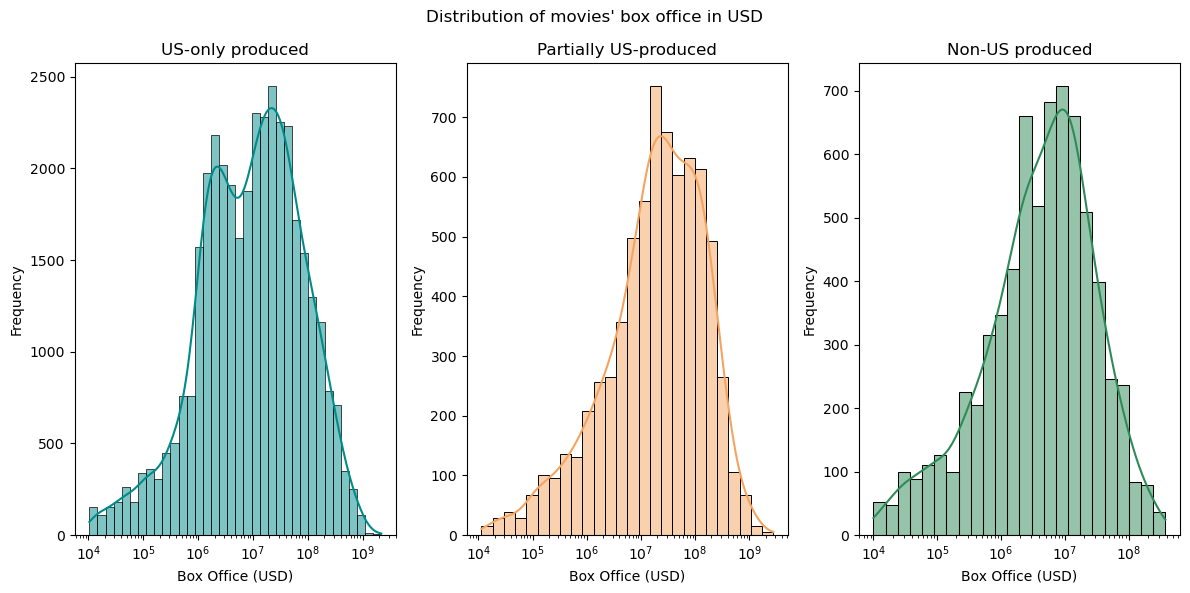

In [7]:
# First visualization

fig, axes = plt.subplots(1, 3, figsize = (12,6))
# stat = 'frequency' chosen since it represent the relative frequency (proportion) of movies in each bin, scaled to sum to 1.
# And it is useful for comparing distributions with different sample sizes
sns.histplot(us_movies['box_office'], kde=True, stat='frequency', bins = 'auto', color='darkcyan', cumulative = False, log_scale= True, ax=axes[0]).set(title="US-only produced") # bins = 'auto' produces too small binsi if no log scale used
axes[0].set_xlabel("Box Office (USD)")
sns.histplot(us_partially_movies['box_office'], kde=True, stat='frequency', bins = 'auto', color='sandybrown', cumulative = False, log_scale= True, ax=axes[1]).set(title="Partially US-produced")
axes[1].set_xlabel("Box Office (USD)")
sns.histplot(rest_world_non_US['box_office'], kde=True, stat='frequency', bins = 'auto', color='seagreen', cumulative = False, log_scale= True, ax=axes[2]).set(title="Non-US produced") 
axes[2].set_xlabel("Box Office (USD)")
fig.suptitle("Distribution of movies' box office in USD")
fig.tight_layout()
plt.show()

Without using a log-scale, one immediately sees that the box office values in USD follow a heavy-tailed distribution. Indeed, a few films generated  about one billion USD while the vast majority generated around 50 to 100 million dollars. Furthermore, the distribution is right-skewed. This means that the mean and standard deviation are meaningless (**chiant pour la suite, à discuter et lien avec log scale parce que je "corrige" ça dans uns sens**)
So one uses a logarithmic x-axis to better capture the different distributions. By looking at the three above charts, one observes that US movies (both only and partially produced in the US) generate box office revenue ranging between 10'00 and about 1 billion dollars. On the other hand, the movies' box office produced in the rest of the world only range between 10'000 and about 100 millions dollars. Moreover, the above plots illustrate the fact that there are more US-only american movies produced than partially US or non-Us produced movies since the freqeuncy is higher (**reprendre**).

In [ ]:
# Proportions of movies between box office box office value intervals

Investigating the NaN values

In [8]:
nan_number_all_movies_box_office = all_movies['box_office'].isna().sum(axis = 0)
nan_number_US_movies_box_office = us_movies['box_office'].isna().sum(axis = 0)
nan_number_partially_US_movies_box_office = us_partially_movies['box_office'].isna().sum(axis = 0)
nan_number_ROW_box_office = rest_world_non_US['box_office'].isna().sum(axis = 0)
print(f"Proportion of NaN box office values in the whole dataset: {(nan_number_all_movies_box_office/len(all_movies))*100:.2f} %.")
print(f"Proportion of NaN box office values for US-only produced movies : {(nan_number_US_movies_box_office/len(us_movies))*100:.2f} %.")
print(f"Proportion of NaN box office values for US-only produced movies : {(nan_number_partially_US_movies_box_office/len(us_partially_movies))*100:.2f} %.")
print(f"Proportion of NaN box office values for non-US (ROW) produced movies : {(nan_number_ROW_box_office/len(rest_world_non_US))*100:.2f} %.")

Proportion of NaN box office values in the whole dataset: 89.72 %.
Proportion of NaN box office values for US-only produced movies : 81.90 %.
Proportion of NaN box office values for US-only produced movies : 64.64 %.
Proportion of NaN box office values for non-US (ROW) produced movies : 96.62 %.


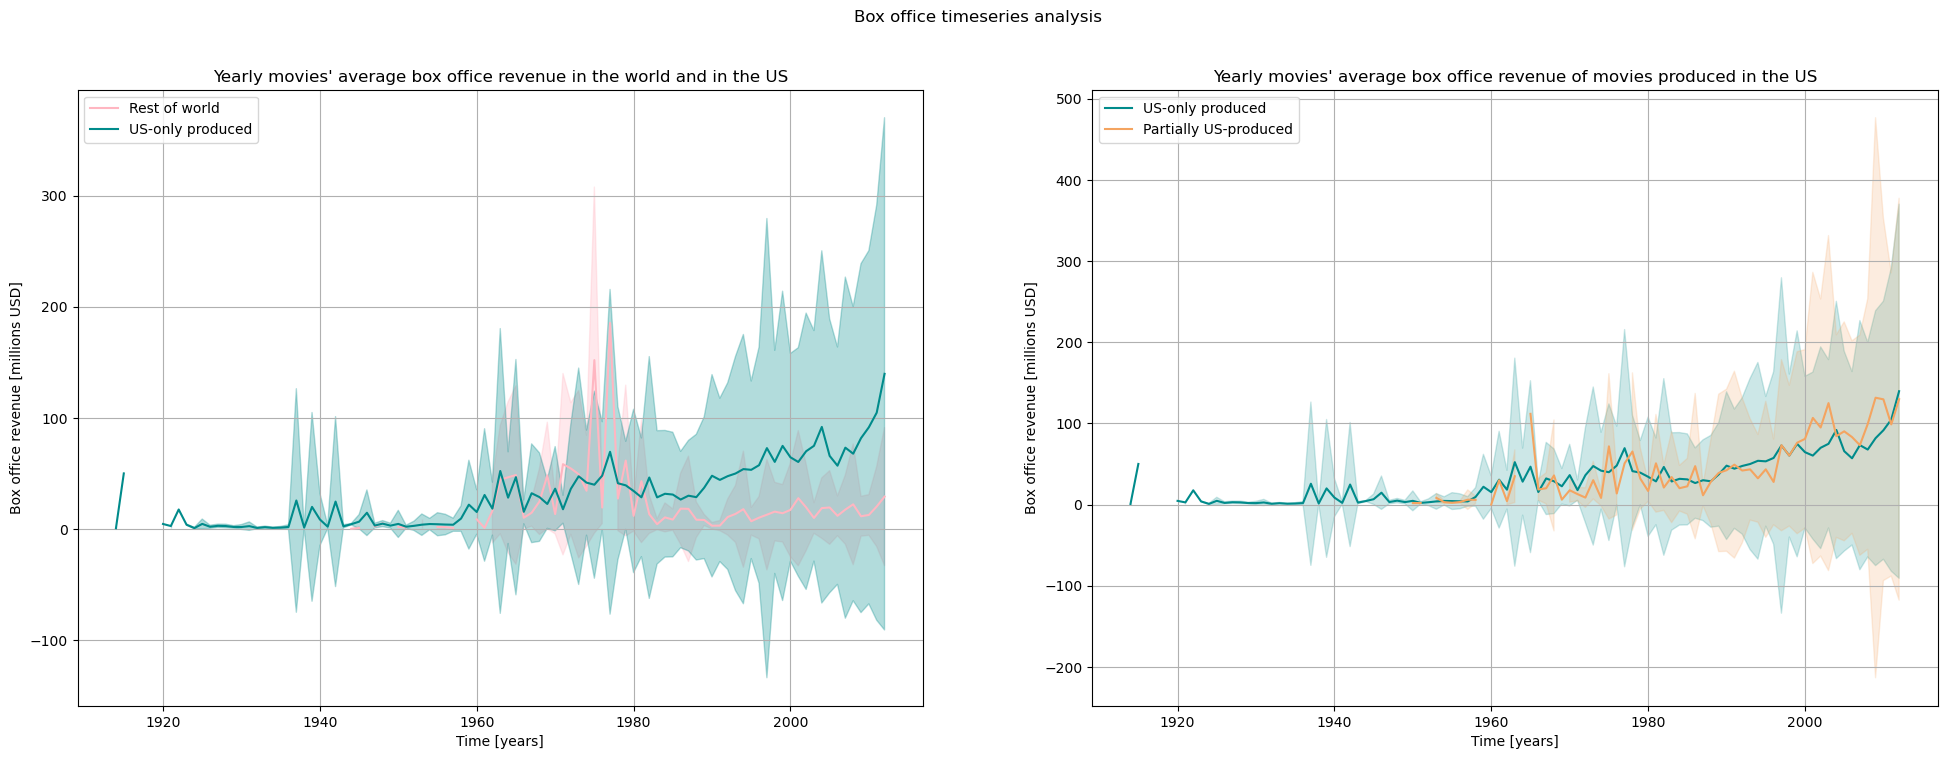

In [11]:
# average box office revenue for all movies per year world wide
avrg_ROW_box_office_per_year = rest_world_non_US.groupby('release_year')['box_office'].mean()
std_ROW_box_office_per_year = rest_world_non_US.groupby('release_year')['box_office'].std()

# average box office revenue for all movies per year in the US (movies STRICTLY produced in the US)
avrg_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].mean()
std_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].std()

# average box office revenue for all movies per year in the US (movies PARTIALLY produced in the US)
avrg_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].mean()
std_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].std()

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (24,8))
ax[0].plot(rest_world_non_US['release_year'].drop_duplicates().sort_values()[:-1], avrg_ROW_box_office_per_year/(1e6), label = 'Rest of world', color = 'lightpink') # [:-1] to remove the single nan from the release year column
ax[0].fill_between(rest_world_non_US['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_ROW_box_office_per_year - std_ROW_box_office_per_year)/(1e6), y2 = (avrg_ROW_box_office_per_year + std_ROW_box_office_per_year)/(1e6), linestyle='-', color='lightpink', alpha=0.3)
ax[0].plot(us_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_box_office_per_year/(1e6), label = 'US-only produced', color = 'darkcyan')
ax[0].fill_between(us_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_box_office_per_year - std_us_box_office_per_year)/(1e6), y2 = (avrg_us_box_office_per_year + std_us_box_office_per_year)/(1e6), linestyle='-', color='darkcyan', alpha=0.3)
ax[0].set_title("Yearly movies' average box office revenue in the world and in the US")
ax[0].set_xlabel("Time [years]")
ax[0].set_ylabel("Box office revenue [millions USD]")
ax[0].legend()
ax[0].grid()

ax[1].plot(us_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_box_office_per_year/(1e6), label = 'US-only produced', color='darkcyan')
ax[1].fill_between(us_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_box_office_per_year - std_us_box_office_per_year)/(1e6), y2 = (avrg_us_box_office_per_year + std_us_box_office_per_year)/(1e6), linestyle='-', color='darkcyan', alpha=0.2)
# us partial
ax[1].plot(us_partially_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_partial_box_office_per_year/(1e6), label = 'Partially US-produced', color = 'sandybrown')
ax[1].fill_between(us_partially_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= (avrg_us_partial_box_office_per_year - std_us_partial_box_office_per_year)/(1e6), y2 = (avrg_us_partial_box_office_per_year + std_us_partial_box_office_per_year)/(1e6), linestyle='-', color='sandybrown', alpha=0.2)
ax[1].set_title("Yearly movies' average box office revenue of movies produced in the US")
ax[1].set_xlabel("Time [years]")
ax[1].set_ylabel("Box office revenue [millions USD]")
ax[1].legend()
ax[1].grid()
fig.suptitle("Box office timeseries analysis")
plt.show()

The timeseries of yearly box office revenue is shown in the two above plots. First, one sees that from 1920 to 1940, movies were only produced in the US. This concinside more or less with the creation of the first Hollywood studios (1913). Then, by comparing the yearly average box office revenue between US-only and non-US produced movies, one clearly sees that the average yearly box office is higher between 1920 and 1965 and in the period 1980-2016. Between 1965 and 1980, the US only produced movies generated less movies per year than the ROW movies (**chercher une explication**). Finally, the plot shows an increasing trend in yeaarly average box office revenue for US-only produced movies. For the movies produced in the rest of the world, a decreasing trend is to be seen until 1990. After this date, the yearly average box ofice revenue increases again but more slowly.<br>
<br>
Moving on to the right plot, one notices that first until the 60s, US-only produced movies were generating higher revenue on average yearly. After 1960, there is no clear disctinction between average yearly box offices values for US-only and partially-US produced movies. However, since 2000 it seems that producing a film only partially in the US is beneficial in terms of yearly averarage box office revenues. This can be explained by the fact that nowadays, movies are generally not only produced in one country since many virtual effects companies are taking contract worldwide. Furthermore, it is sometimes cheaper to produce a movies partially out of the US because labor is cheaper.<br>
<br>
Finally, one highlights the fact that the errors intervalls (filled with semi-transparent color) are quite important. This comes from the fact that teh standard deviation is bigger than the mean for many movies (cf. section *Basic Stats*). This can be explain by the fact that the box office distribution is heavy tailed, meaning that there are some movies that gerenerate a very high revenue as *Avatar* for example (cf. above) which pulls up other box office values. Movies with really small box office revenus as depicted in the 20s to the 60s are also responsible for this huge errorbars since they pulls down other box office values. **One can therefore question the relevance of using the mean and standard deviation for theses plots**. The problem is that the median is not suited to create such plots. (**DISCUTER**)

SAME ANALYSIS BUT WITH NO NaN (to see if the plot is more pretty)

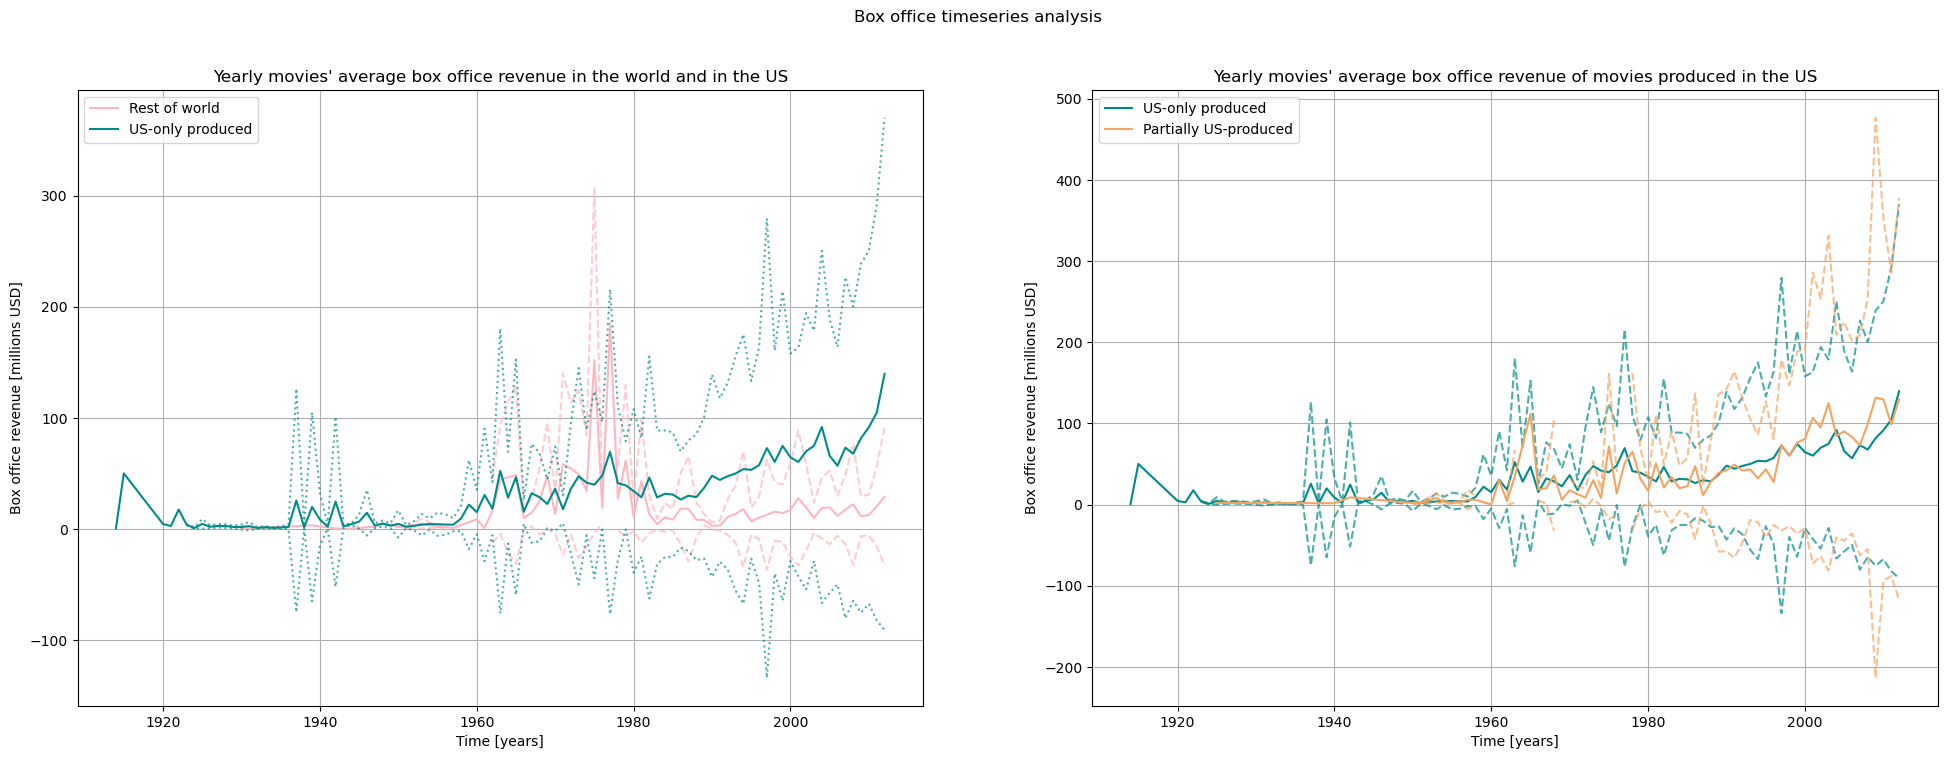

In [ ]:
# Drop NaN values from relevant columns
rest_world_non_US = rest_world_non_US.dropna(subset=['box_office', 'release_year'])
us_movies = us_movies.dropna(subset=['box_office', 'release_year'])
us_partially_movies = us_partially_movies.dropna(subset=['box_office', 'release_year'])

# Recalculate averages and standard deviations after dropping NaNs
avrg_ROW_box_office_per_year = rest_world_non_US.groupby('release_year')['box_office'].mean()
std_ROW_box_office_per_year = rest_world_non_US.groupby('release_year')['box_office'].std()

avrg_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].mean()
std_us_box_office_per_year = us_movies.groupby('release_year')['box_office'].std()

avrg_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].mean()
std_us_partial_box_office_per_year = us_partially_movies.groupby('release_year')['box_office'].std()

# Plot with dotted lines for error boundaries
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# First subplot: Rest of World vs. US-only
ax[0].plot(rest_world_non_US['release_year'].drop_duplicates().sort_values(), avrg_ROW_box_office_per_year / 1e6, label='Rest of world', color='lightpink')
ax[0].plot(rest_world_non_US['release_year'].drop_duplicates().sort_values(), (avrg_ROW_box_office_per_year - std_ROW_box_office_per_year) / 1e6, linestyle=':', color='lightpink', alpha=0.7)
ax[0].plot(rest_world_non_US['release_year'].drop_duplicates().sort_values(), (avrg_ROW_box_office_per_year + std_ROW_box_office_per_year) / 1e6, linestyle=':', color='lightpink', alpha=0.7)

ax[0].plot(us_movies['release_year'].drop_duplicates().sort_values(), avrg_us_box_office_per_year / 1e6, label='US-only produced', color='darkcyan')
ax[0].plot(us_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_box_office_per_year - std_us_box_office_per_year) / 1e6, linestyle=':', color='darkcyan', alpha=0.7)
ax[0].plot(us_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_box_office_per_year + std_us_box_office_per_year) / 1e6, linestyle=':', color='darkcyan', alpha=0.7)

ax[0].set_title("Yearly movies' average box office revenue in the world and in the US")
ax[0].set_xlabel("Time [years]")
ax[0].set_ylabel("Box office revenue [millions USD]")
ax[0].legend()
ax[0].grid()

# Second subplot: US-only vs. Partially US-produced
ax[1].plot(us_movies['release_year'].drop_duplicates().sort_values(), avrg_us_box_office_per_year / 1e6, label='US-only produced', color='darkcyan')
ax[1].plot(us_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_box_office_per_year - std_us_box_office_per_year) / 1e6, linestyle='dashed', color='darkcyan', alpha=0.7)
ax[1].plot(us_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_box_office_per_year + std_us_box_office_per_year) / 1e6, linestyle='dashed', color='darkcyan', alpha=0.7)

ax[1].plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), avrg_us_partial_box_office_per_year / 1e6, label='Partially US-produced', color='sandybrown')
ax[1].plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_partial_box_office_per_year - std_us_partial_box_office_per_year) / 1e6, linestyle= 'dashed', color='sandybrown', alpha=0.7)
ax[1].plot(us_partially_movies['release_year'].drop_duplicates().sort_values(), (avrg_us_partial_box_office_per_year + std_us_partial_box_office_per_year) / 1e6, linestyle='dashed', color='sandybrown', alpha=0.7)

ax[1].set_title("Yearly movies' average box office revenue of movies produced in the US")
ax[1].set_xlabel("Time [years]")
ax[1].set_ylabel("Box office revenue [millions USD]")
ax[1].legend()
ax[1].grid()

fig.suptitle("Box office timeseries analysis")
plt.show()


3eme essai avec seaborn

Analysis of movies runtimes'
<br>
Recall films lasting more than 180 minutes are discarded.

Basic stats

In [ ]:
# whole dataset
basic_stats_runtime_all_movies = all_movies['runtime'].describe()
# american movies STRICTLY produced in the US
basic_stats_runtime_US = us_movies['runtime'].describe()
# american movies PARTIALLY produced in the US
basic_stats_runtime_US_partial = us_partially_movies['runtime'].describe()
# Rest of world (= Non Us movies)
basic_stats_runtime_ROW = rest_world_non_US['runtime'].describe()

dict_results = {'All movies': [basic_stats_runtime_all_movies.loc['50%'], basic_stats_runtime_all_movies.loc['mean'], basic_stats_runtime_all_movies.loc['std'], basic_stats_runtime_all_movies.loc['max'], basic_stats_runtime_all_movies.loc['min']], 
                'US-only produced': [basic_stats_runtime_US.loc['50%'], basic_stats_runtime_US.loc['mean'], basic_stats_runtime_US.loc['std'], basic_stats_runtime_US.loc['max'], basic_stats_runtime_US.loc['min']], 
                'Partially US-produced': [basic_stats_runtime_US_partial.loc['50%'], basic_stats_runtime_US_partial.loc['mean'], basic_stats_runtime_US_partial.loc['std'], basic_stats_runtime_US_partial.loc['max'], basic_stats_runtime_all_movies.loc['min']],
                'Non US produced (ROW)': [basic_stats_runtime_ROW.loc['50%'], basic_stats_runtime_ROW.loc['mean'], basic_stats_runtime_ROW.loc['std'], basic_stats_runtime_ROW.loc['max'], basic_stats_runtime_ROW.loc['min']]}

df_basic_stat_box_office = pd.DataFrame(dict_results, index = ['median (minutes)', 'mean (minutes)', 'std (minutes)', 'max (minutes)', 'min (minutes)'])
df_basic_stat_box_office.style.format("{:.1f}") # to display only 1 decimal after the comma taking advantage of the Jupyter notebook environment

,All movies,US-only produced,Partially US-produced,Non US produced (ROW)
median (minutes),93.0,90.0,97.0,96.0
mean (minutes),91.2,83.9,99.3,97.6
std (minutes),30.8,29.5,23.1,30.4
max (minutes),180.0,180.0,180.0,180.0
min (minutes),0.0,0.0,0.0,0.0


One observes that for all the different categories of production the mdein is locatd around 95 minutes. The mean is a bit higher, around 100 minutes. The standard deviation is around 30 minutes which big since some films are very short. Indeed the first movies back in the 20s were very short films lasting less than 60 minutes.

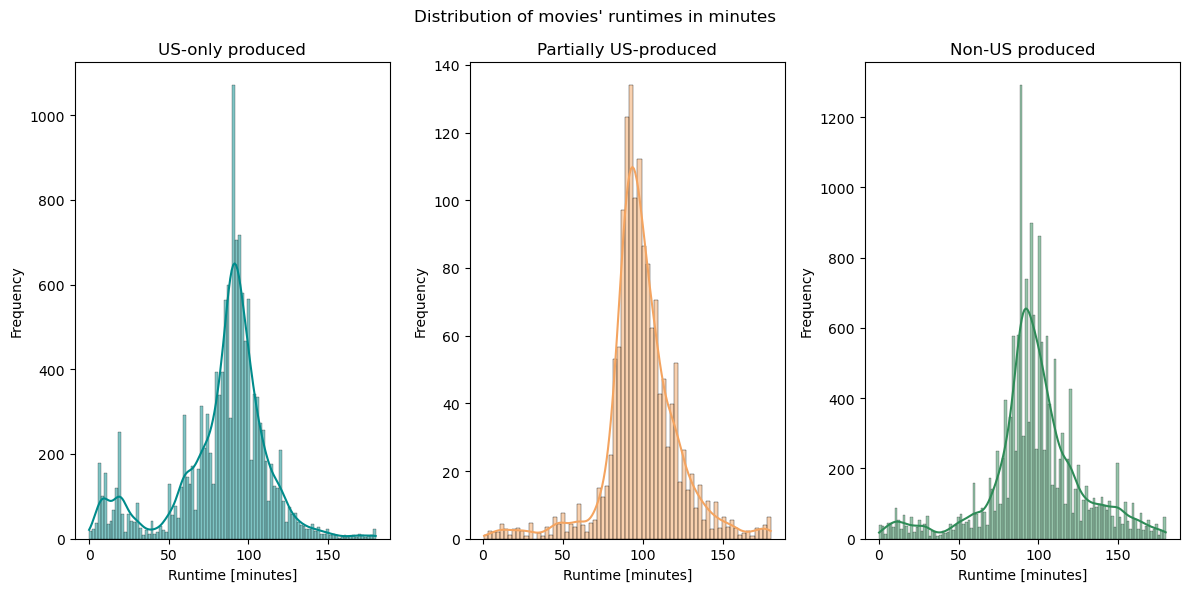

In [24]:
# First visualization

fig, axes = plt.subplots(1, 3, figsize = (12,6))
# stat = 'frequency' chosen since it represent the relative frequency (proportion) of movies in each bin, scaled to sum to 1.
# And it is useful for comparing distributions with different sample sizes
sns.histplot(us_movies['runtime'], kde=True, stat='frequency', bins = 'auto', color='darkcyan', cumulative = False, log_scale= False, ax=axes[0]).set(title="US-only produced") # bins = 'auto' produces too small binsi if no log scale used
axes[0].set_xlabel("Runtime [minutes]")
sns.histplot(us_partially_movies['runtime'], kde=True, stat='frequency', bins = 'auto', color='sandybrown', cumulative = False, log_scale= False, ax=axes[1]).set(title="Partially US-produced")
axes[1].set_xlabel("Runtime [minutes]")
sns.histplot(rest_world_non_US['runtime'], kde=True, stat='frequency', bins = 'auto', color='seagreen', cumulative = False, log_scale= False, ax=axes[2]).set(title="Non-US produced") 
axes[2].set_xlabel("Runtime [minutes]")
fig.suptitle("Distribution of movies' runtimes in minutes")
fig.tight_layout()
plt.show()

For US-only, partially-US and Non-US produced movies, the distribution seems to follow more or less a normal distribution centered around 100 minutes (1h40). For US-only produced movies one notices a bimodal behavior since there is quite a lot of movies lasting less than 50 minutes. Once again this is beacuse of the silent and short the lauched the cinema industry back in the 20s-30s.

Timeseries analysis

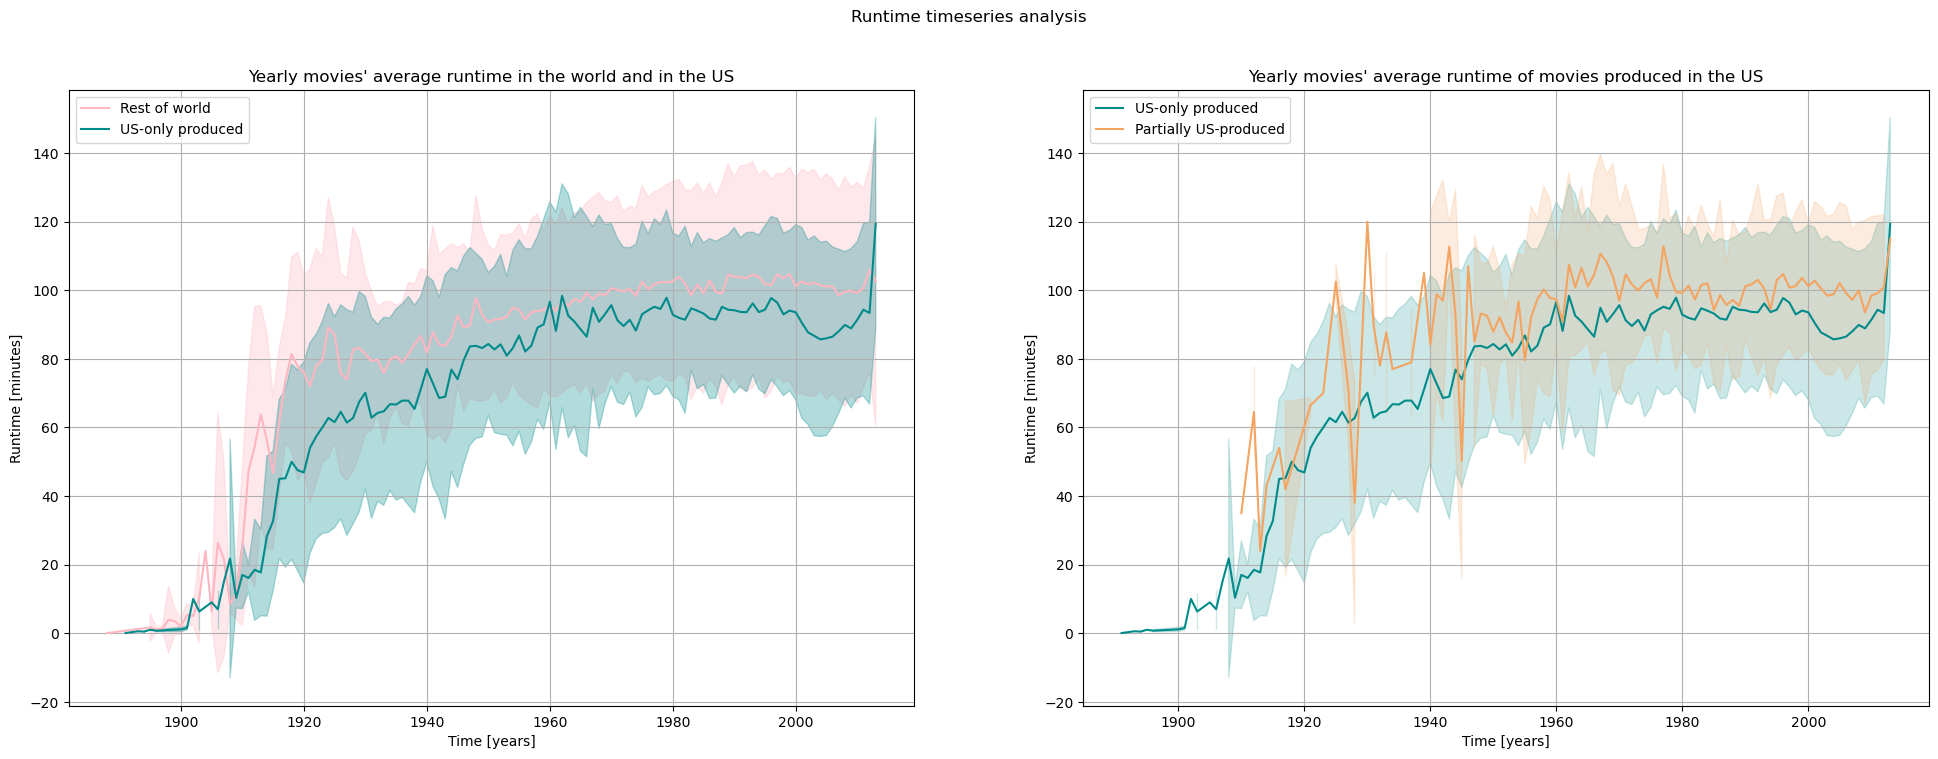

In [33]:
# average box office revenue for all movies per year world wide
avrg_ROW_runtime_per_year = rest_world_non_US.groupby('release_year')['runtime'].mean()
std_ROW_runtime_per_year = rest_world_non_US.groupby('release_year')['runtime'].std()

# average box office revenue for all movies per year in the US (movies STRICTLY produced in the US)
avrg_us_runtime_per_year = us_movies.groupby('release_year')['runtime'].mean()
std_us_runtime_per_year = us_movies.groupby('release_year')['runtime'].std()

# average box office revenue for all movies per year in the US (movies PARTIALLY produced in the US)
avrg_us_partial_runtime_per_year = us_partially_movies.groupby('release_year')['runtime'].mean()
std_us_partial_runtime_per_year = us_partially_movies.groupby('release_year')['runtime'].std()

fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (24,8))
ax[0].plot(rest_world_non_US['release_year'].drop_duplicates().sort_values()[:-1], avrg_ROW_runtime_per_year, label = 'Rest of world', color = 'lightpink') # [:-1] to remove the single nan from the release year column
ax[0].fill_between(rest_world_non_US['release_year'].drop_duplicates().sort_values()[:-1], y1= avrg_ROW_runtime_per_year - std_ROW_runtime_per_year, y2 = avrg_ROW_runtime_per_year + std_ROW_runtime_per_year, linestyle='-', color='lightpink', alpha=0.3)
ax[0].plot(us_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_runtime_per_year, label = 'US-only produced', color = 'darkcyan')
ax[0].fill_between(us_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= avrg_us_runtime_per_year - std_us_runtime_per_year, y2 = avrg_us_runtime_per_year + std_us_runtime_per_year, linestyle='-', color='darkcyan', alpha=0.3)
ax[0].set_title("Yearly movies' average runtime in the world and in the US")
ax[0].set_xlabel("Time [years]")
ax[0].set_ylabel("Runtime [minutes]")
ax[0].legend()
ax[0].grid()

ax[1].plot(us_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_runtime_per_year, label = 'US-only produced', color='darkcyan')
ax[1].fill_between(us_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= avrg_us_runtime_per_year - std_us_runtime_per_year, y2 = avrg_us_runtime_per_year + std_us_runtime_per_year, linestyle='-', color='darkcyan', alpha=0.2)
# us partial
ax[1].plot(us_partially_movies['release_year'].drop_duplicates().sort_values()[:-1], avrg_us_partial_runtime_per_year, label = 'Partially US-produced', color = 'sandybrown')
ax[1].fill_between(us_partially_movies['release_year'].drop_duplicates().sort_values()[:-1], y1= avrg_us_partial_runtime_per_year - std_us_partial_runtime_per_year, y2 = avrg_us_partial_runtime_per_year + std_us_partial_runtime_per_year, linestyle='-', color='sandybrown', alpha=0.2)
ax[1].set_title("Yearly movies' average runtime of movies produced in the US")
ax[1].set_xlabel("Time [years]")
ax[1].set_ylabel("Runtime [minutes]")
ax[1].legend()
ax[1].grid()
fig.suptitle("Runtime timeseries analysis")
plt.show()

TODO
- graphe camembert --> mettre que le plus détaillé seulement et mettre deux couleurs proches entre les deux trucs liés aux US
- box office
    - graphe timeseries box --> pas fill, les deux bound en trait-tillé + faire 
    - plot la distribution du box office
    - expliciter notre choix pour les NaN --> en print des (shape), les % de loss de data
- runtimes
    - reprendre les timeseries comme pour box office + vérifier
    - plots la distribution des runtimes et expliqué notre cut entre une valeur et une autre

- IMDB ratings:
    - ajouter la distribution du box office

- plots "corrélés"
1 plot :
    - IMBD vs box office
    - IMBD vs nb language traduced 
    - IMDB vs runtime (peut rien dire vue que aggrégé)
... + variables pertinentes

extract variables a IMDB
    - runtime vs box
    - pour tous les plots ci dessus:
        - fit un droite de regression et faire de spearman et correlation et print les pvalues
        - mettre les plots ci-dessus dans un subplot 4x4